## <div style="text-align:center;text-decoration:underline;color:brown">Researcher: Akinsulure Akintunde</div>

**<u>Problem Statement:</u>**

In the realm of talent management, organizations grapple with the challenge of predicting and understanding employee attribution to enhance retention strategies. The need for accurate forecasting models is evident as businesses strive to optimize their workforce and create a workplace conducive to employee satisfaction and longevity. The task is to develop a predictive model that effectively analyzes HR data, identifies influential factors, and offers insights into employee turnover patterns, ultimately contributing to strategic talent management. 

How can we leverage data and AI to predict employee attribution, enabling organizations to proactively address retention challenges and foster a more stable and productive workforce?

---

### <div style='text-align:center;text-decoration:underline'>Loading the datasets from csv files into pandas</div>

In [337]:
### Neccessary libraries

import pandas as pd
import numpy as np

## Visualization dependencies
import seaborn as sb
import matplotlib.pyplot as plt

### Custom Plot settings
plt.rcParams['figure.figsize'] = (15, 8)
sb.set_style('whitegrid')

# setting pandas to display all columns
pd.set_option('display.max_columns', None)


## Handling warnings
import warnings
warnings.filterwarnings('ignore')   ### ignoring possible future warnings

In [338]:
# Train data
train_data = pd.read_csv("data/train.csv")

## Inspecting the head
train_data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


In [339]:
# Test data
test_data = pd.read_csv("data/test.csv")

## Inspecting the head
test_data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,Male,43,3,1,Laboratory Technician,3,Single,2318,17778,1,Y,No,12,3,4,80,0,1,2,2,1,0,0,0
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,Male,67,3,2,Sales Executive,1,Divorced,5486,12421,6,Y,Yes,12,3,3,80,1,7,3,3,2,2,2,2
2,1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,Male,41,3,1,Research Scientist,4,Divorced,2741,23577,4,Y,Yes,13,3,2,80,2,13,2,2,7,7,1,7
3,1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,Male,89,2,2,Healthcare Representative,3,Single,5228,20364,1,Y,No,13,3,3,80,0,14,2,2,14,10,11,8
4,1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,Male,79,3,1,Laboratory Technician,4,Single,1223,15178,1,Y,No,14,3,1,80,0,1,5,3,1,0,0,0


In [340]:
## Finally , viewing how the submission should look like
sample_sub = pd.read_csv('data/sample_submission.csv')
sample_sub.head()

,id,Attrition
0,1677,0.119261
1,1678,0.119261
2,1679,0.119261
3,1680,0.119261
4,1681,0.119261


The hackathon Submission file should be in this format, i.e having the `id` and `Attrition` columns

---

### <div style="text-align:center">Exploratory Data Analysis</div>

In [341]:
### Descriptive stats of numeric values in train data using the pandas describe function
train_data.describe(exclude='O')

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,2.791890,6196.049493,14770.048301,2.574836,14.903399,3.127609,2.751342,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,1.097396,4520.050754,7112.203888,2.480215,3.420801,0.333753,1.077905,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1010.000000,636.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,2.000000,2875.000000,8509.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,3.000000,4834.000000,15332.000000,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,4.000000,7403.000000,20990.000000,4.000000,17.000000,3.000000,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,4.000000,19973.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [342]:
### Descriptive stats of numeric values in test data using the pandas describe function
test_data.describe(exclude='O')

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.0,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.0,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,2236.000000,36.147453,883.550492,8.667560,2.941912,1.0,2.736372,68.226095,2.741734,1.999106,2.767650,6153.750670,14712.646113,2.544236,14.763181,3.109026,2.722073,80.0,0.758713,10.685433,2.795353,2.759607,7.016979,4.184093,2.076854,4.308311
std,323.171781,8.786102,366.427230,7.772384,1.012986,0.0,1.106668,19.495282,0.652751,1.091109,1.103576,4558.597502,6916.185207,2.460340,3.397653,0.311811,1.058472,0.0,0.826037,7.251628,1.195600,0.656830,5.975403,3.533139,3.278022,3.729282
min,1677.000000,18.000000,6.000000,1.000000,1.000000,1.0,0.000000,30.000000,0.000000,1.000000,1.000000,464.000000,959.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1956.500000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,52.000000,2.000000,1.000000,2.000000,2853.000000,8821.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,2236.000000,35.000000,889.000000,7.000000,3.000000,1.0,3.000000,71.000000,3.000000,2.000000,3.000000,4721.000000,15211.000000,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2515.500000,41.000000,1206.000000,12.000000,4.000000,1.0,4.000000,85.000000,3.000000,2.000000,4.000000,7082.500000,20652.000000,4.000000,17.000000,3.000000,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,2795.000000,59.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,17.000000,25.000000,4.000000,4.000000,80.0,4.000000,38.000000,6.000000,4.000000,36.000000,17.000000,15.000000,17.000000


In [343]:
### Descriptive stats of non-numeric values in train data using the pandas describe function
train_data.describe(include='O')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1677,1677,1677,1677,1677,1677,1677,1677
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1290,1167,775,1064,355,773,1677,1277


In [344]:
### Descriptive stats of non-numeric values in test data using the pandas describe function
test_data.describe(include='O')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1119,1119,1119,1119,1119,1119,1119,1119
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,799,777,519,690,240,524,1119,852


In [345]:
### Train data inspection with custom df
def get_overview(df):
    var_df = pd.DataFrame(columns=[
        'Variable', 'NaN', 'Percentage Missing', 'Unique', 'N-Unique', 'Dtype',
        'Duplicated Rows'
    ])
    for i, col in enumerate(df.columns):
        missing = f"{round((df[col].isna().sum() / len(df[col]))*100, 2)}%"
        duplicated = len(df[col][df[col].duplicated() == True])
        var_df.loc[i] = [
            col, df[col].isna().sum(), missing, df[col].unique(),
            df[col].nunique(), df[col].dtypes, duplicated
        ]
    var_df.reset_index(inplace=True)
    return var_df


get_overview(train_data)

,index,Variable,NaN,Percentage Missing,Unique,N-Unique,Dtype,Duplicated Rows
0,0,id,0,0.0%,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1677,int64,0
1,1,Age,0,0.0%,"[36, 35, 32, 38, 50, 27, 34, 40, 51, 25, 29, 4...",43,int64,1634
2,2,BusinessTravel,0,0.0%,"[Travel_Frequently, Travel_Rarely, Non-Travel]",3,object,1674
3,3,DailyRate,0,0.0%,"[599, 921, 718, 1488, 1017, 566, 944, 1009, 12...",625,int64,1052
4,4,Department,0,0.0%,"[Research & Development, Sales, Human Resources]",3,object,1674
5,5,DistanceFromHome,0,0.0%,"[24, 8, 26, 2, 5, 10, 6, 9, 28, 1, 25, 11, 7, ...",29,int64,1648
6,6,Education,0,0.0%,"[3, 4, 1, 2, 5, 15]",6,int64,1671
7,7,EducationField,0,0.0%,"[Medical, Other, Marketing, Life Sciences, Tec...",6,object,1671
8,8,EmployeeCount,0,0.0%,[1],1,int64,1676
9,9,EnvironmentSatisfaction,0,0.0%,"[4, 1, 3, 2]",4,int64,1673


In [346]:
get_overview(test_data)

,index,Variable,NaN,Percentage Missing,Unique,N-Unique,Dtype,Duplicated Rows
0,0,id,0,0.0%,"[1677, 1678, 1679, 1680, 1681, 1682, 1683, 168...",1119,int64,0
1,1,Age,0,0.0%,"[19, 45, 37, 32, 29, 51, 52, 30, 44, 42, 35, 2...",42,int64,1077
2,2,BusinessTravel,0,0.0%,"[Non-Travel, Travel_Rarely, Travel_Frequently]",3,object,1116
3,3,DailyRate,0,0.0%,"[992, 1136, 155, 688, 464, 990, 1146, 945, 548...",515,int64,604
4,4,Department,0,0.0%,"[Research & Development, Sales, Human Resources]",3,object,1116
5,5,DistanceFromHome,0,0.0%,"[1, 4, 13, 9, 20, 6, 5, 7, 26, 14, 2, 3, 11, 1...",29,int64,1090
6,6,Education,0,0.0%,"[1, 4, 3, 2, 5]",5,int64,1114
7,7,EducationField,0,0.0%,"[Medical, Marketing, Life Sciences, Technical ...",6,object,1113
8,8,EmployeeCount,0,0.0%,[1],1,int64,1118
9,9,EnvironmentSatisfaction,0,0.0%,"[4, 3, 2, 1, 0]",5,int64,1114


This is lovely news!!! no missing values in both datasets at all !!!

---

**Correlation Matrix Checking correlation between numerica Features**

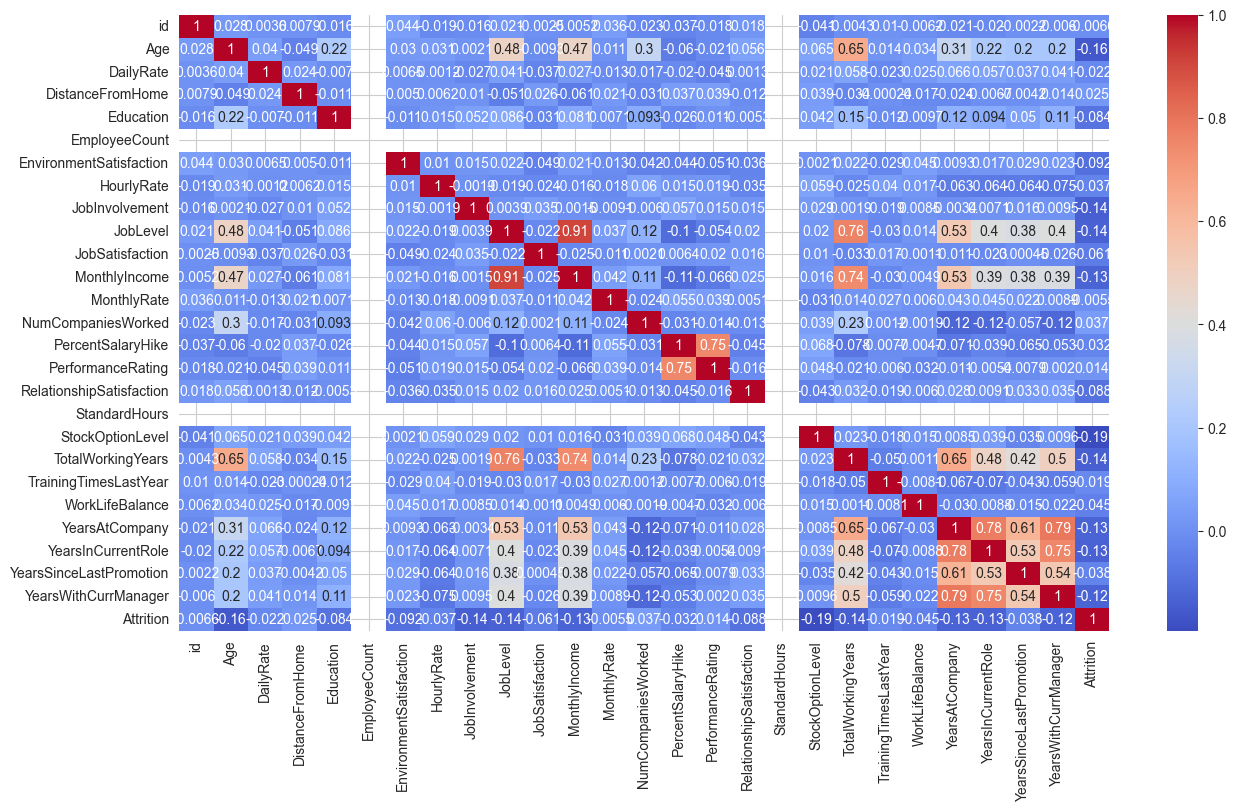

In [347]:
plt.figure(figsize=(15,8))
sb.heatmap(train_data.select_dtypes('int64').corr(),annot=True, cmap='coolwarm');

Terrible looking heatmap🤣, so it would need some attention during cleaning

### <div style="text-align:center">EDA and Data Visualization</div>

In [348]:
### combining the dataset for cleaning

## Giving each of then unique identifiers to make seperation easier
train_data['ind'] = 0
test_data['ind'] = 1

combined_df = pd.concat([train_data, test_data], axis=0)
combined_df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,ind
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0.0,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0.0,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0.0,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0.0,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1.0,0


In [349]:
### Brief overview of the combined data set
get_overview(combined_df)

,index,Variable,NaN,Percentage Missing,Unique,N-Unique,Dtype,Duplicated Rows
0,0,id,0,0.0%,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2796,int64,0
1,1,Age,0,0.0%,"[36, 35, 32, 38, 50, 27, 34, 40, 51, 25, 29, 4...",43,int64,2753
2,2,BusinessTravel,0,0.0%,"[Travel_Frequently, Travel_Rarely, Non-Travel]",3,object,2793
3,3,DailyRate,0,0.0%,"[599, 921, 718, 1488, 1017, 566, 944, 1009, 12...",734,int64,2062
4,4,Department,0,0.0%,"[Research & Development, Sales, Human Resources]",3,object,2793
5,5,DistanceFromHome,0,0.0%,"[24, 8, 26, 2, 5, 10, 6, 9, 28, 1, 25, 11, 7, ...",29,int64,2767
6,6,Education,0,0.0%,"[3, 4, 1, 2, 5, 15]",6,int64,2790
7,7,EducationField,0,0.0%,"[Medical, Other, Marketing, Life Sciences, Tec...",6,object,2790
8,8,EmployeeCount,0,0.0%,[1],1,int64,2795
9,9,EnvironmentSatisfaction,0,0.0%,"[4, 1, 3, 2, 0]",5,int64,2791


**My experience has proved cleaning is best done by treating each column one by one, so let's go ahead**

---

In [350]:
combined_df.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'ind'],
      dtype='object')

---

#### <u>The `id` column</u>

- This column contains no valid information (just like the indexing of each of the records)...
- It would therefore not be used in training the model, but would be left for further use

--- 

#### <u>The `Age` column</u>

In [351]:
## checking for any employees less than 18
len(combined_df[combined_df.Age < 18])

0

Lovely, there are no underaged workers in this dataset

In [352]:
### Checking for minimum and maximum age
print(f'The Minimum age in this DataSet is: {min(combined_df.Age)}')
print(f'The Maximum age in this DataSet is: {max(combined_df.Age)}')

The Minimum age in this DataSet is: 18
The Maximum age in this DataSet is: 60


Makes sense, Most People should be retired before 60

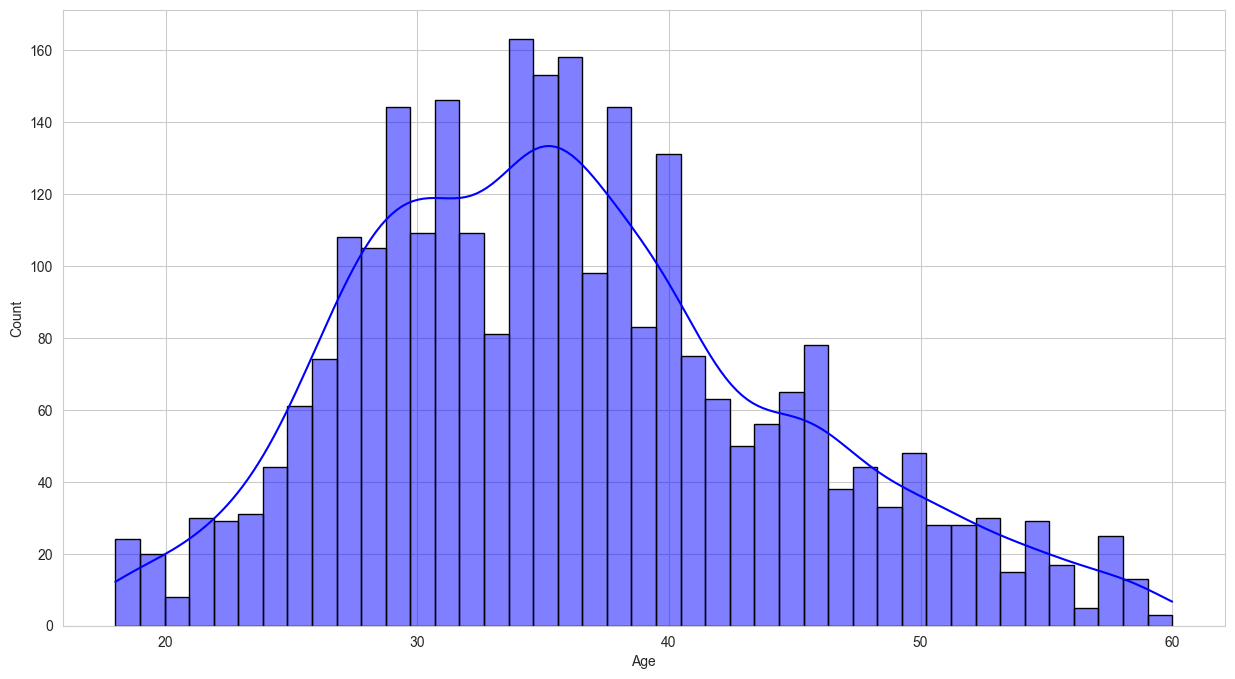

In [353]:
# Checking the distribution of the employee ages using a histogram

sb.histplot(combined_df, x='Age', kde=True, color='blue', edgecolor='black', bins=43);

**Plot Inference:**
-   Most employees are between 30 to 40

---

#### <u>The `BusinessTravel` column</u>

This column represents the frequency of the worker's business travel, which could be categorized as "frequently," "rarely," or "non-travel."

In [354]:
combined_df['BusinessTravel'].value_counts()

Travel_Rarely        2089
Travel_Frequently     473
Non-Travel            234
Name: BusinessTravel, dtype: int64

Perfect, no foreign values

In [355]:
### Checking the Ages with the mode Business Travel type
grouped_data = combined_df.groupby('BusinessTravel')['Age']
mode_by_travel = grouped_data.apply(lambda x: x.mode().iloc[0])
print(f"{' '*20}Age with most frequent travel type\n{'----'*20}\n{mode_by_travel}")

                    Age with most frequent travel type
--------------------------------------------------------------------------------
BusinessTravel
Non-Travel           38
Travel_Frequently    34
Travel_Rarely        34
Name: Age, dtype: int64


column looks good.

---

#### <u>The `DailyRate` column</u>

This column contains the daily rate of pay for each employee.

In [356]:
combined_df['DailyRate'].describe()

count    2796.000000
mean      889.067954
std       371.249481
min         6.000000
25%       589.000000
50%       890.000000
75%      1219.000000
max      3921.000000
Name: DailyRate, dtype: float64

The least daily rate for an employee is `6` dollars, while the maximum is `3921` dollars per day (which is quite extreme)

#### Checking for outliers in this column using boxen plot

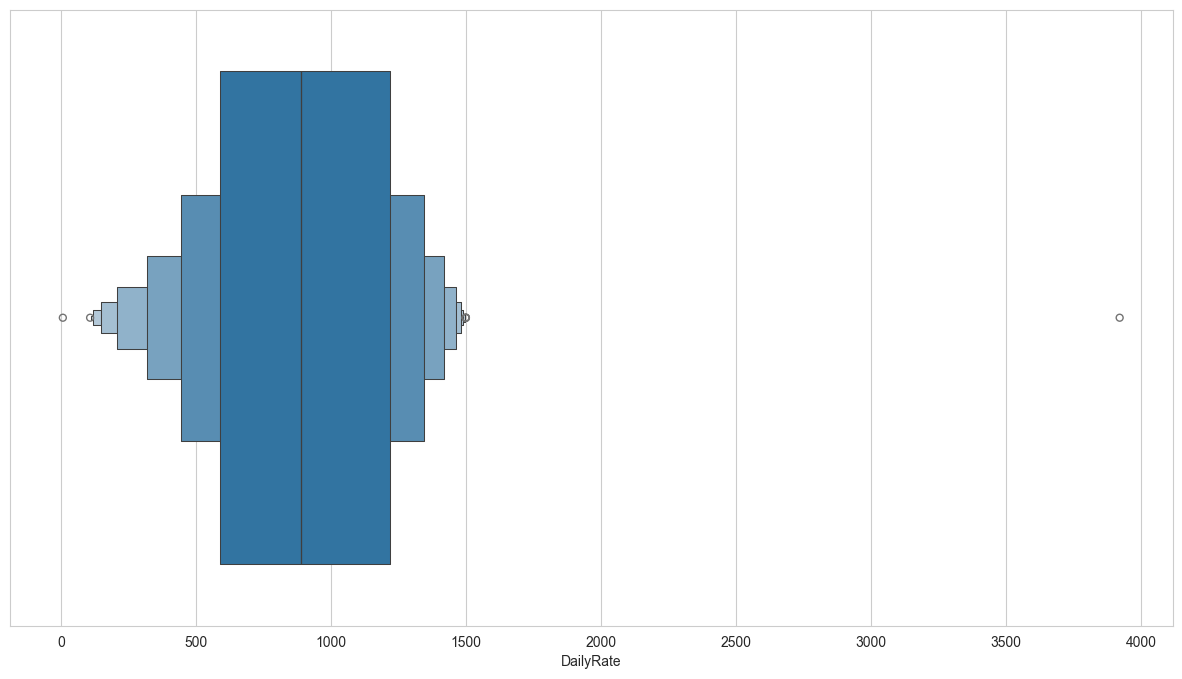

In [357]:
plt.figure(figsize=(15, 8))
sb.boxenplot(combined_df, x='DailyRate');

In [358]:
### From the boxenplot, there's just one case where the daily earning rate was above 2000, indicating an irregularity.. this would be handled by replacing this alone with the mean of the values in the column
combined_df['DailyRate'] = combined_df['DailyRate'].apply(lambda x: combined_df['DailyRate'].mean() if x > 2000 else x )

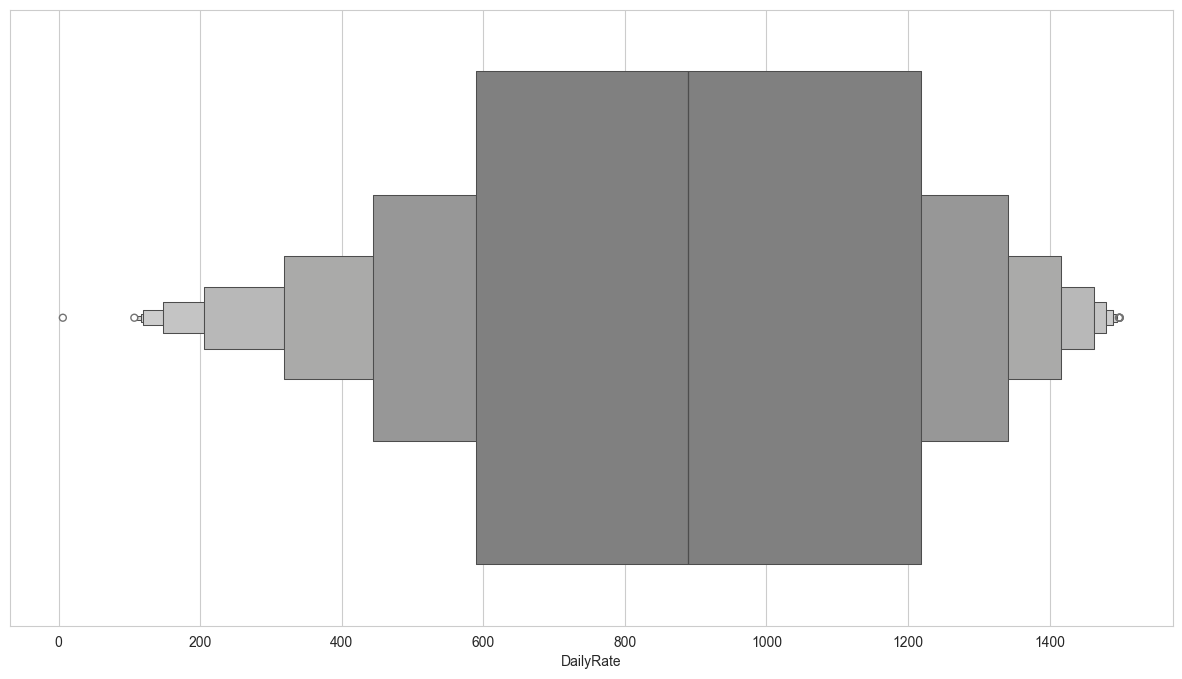

In [359]:
plt.figure(figsize=(15, 8))
sb.boxenplot(combined_df, x='DailyRate',color='grey');

---

#### <u>The `Department` column</u>

This is the department in which the employee works (e.g., Sales, Human Resources, Research & Development).

In [360]:
combined_df['Department'].value_counts()

Research & Development    1944
Sales                      777
Human Resources             75
Name: Department, dtype: int64

In [361]:
### Checking the Department with the highest Daily Rate/Pay
grouped_data = combined_df.groupby('Department')['DailyRate'].mean()
grouped_data

Department
Human Resources           834.333333
Research & Development    879.031928
Sales                     915.558559
Name: DailyRate, dtype: float64

**Inference:**
-    On average all Department members are paid around the same amount, meaning the Department doesn't determine the pay

Column looks good

---

#### <u>The `DistanceFromHome` column</u>

In [362]:
combined_df['DistanceFromHome'].describe()

count    2796.000000
mean        8.677396
std         7.803284
min         1.000000
25%         2.000000
50%         7.000000
75%        12.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

#### Checking for Outliers using box plot

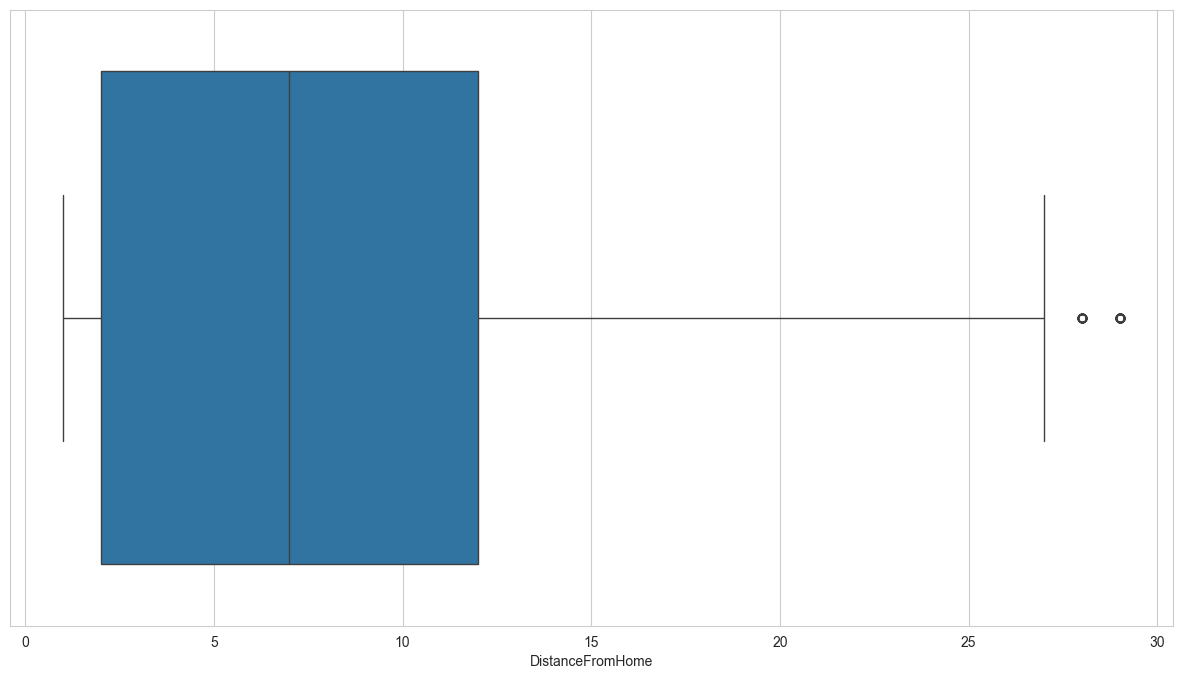

In [363]:
sb.boxplot(combined_df, x='DistanceFromHome');

**Plot Inference:**
-   There are just a few moderate outliers here

---

#### <u>The `Education` column</u>

The level of education attained by the employee, possibly ranging from 1 to 5 as popularly done

In [364]:
combined_df['Education'].value_counts()

3     1142
4      755
2      508
1      302
5       88
15       1
Name: Education, dtype: int64

There is an unusual Educational Level here, so it needs to be attended to

In [365]:
combined_df[combined_df['Education']==15]

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,ind
527,527,38,Travel_Rarely,548.0,Research & Development,1,15,Life Sciences,1,1,Female,72,3,1,Laboratory Technician,4,Divorced,2644,6217,7,Y,No,13,3,1,80,1,7,2,3,5,2,1,4,0.0,0


The record is contained in the train data, so it can be dropped

In [366]:
combined_df = combined_df[combined_df['Education'] <= 5]

In [367]:
### Checking to see if the removal worked
combined_df['Education'].value_counts()

3    1142
4     755
2     508
1     302
5      88
Name: Education, dtype: int64

Perfect!!!!

---

#### <u>The `EducationField` column</u>

This column contains the field of education or specialization of the employee (e.g., Life Sciences, Marketing, Technical Degree).

In [368]:
combined_df['EducationField'].value_counts()

Life Sciences       1293
Medical              894
Marketing            254
Technical Degree     202
Other                127
Human Resources       25
Name: EducationField, dtype: int64

In [369]:
### Checking Education Field with the highest pay

grouped_data = combined_df.groupby('EducationField')['DailyRate'].mean()
grouped_data

EducationField
Human Resources     816.640000
Life Sciences       886.693015
Marketing           866.429134
Medical             899.951902
Other               902.944882
Technical Degree    871.485149
Name: DailyRate, dtype: float64

Still same as earlier, Education Field does not determine the worker's daily pay

---

#### <u>The `EmployeeCount` column</u>

The count of employees, which seems constant and may not provide much information.

In [370]:
combined_df['EmployeeCount'].value_counts()

1    2795
Name: EmployeeCount, dtype: int64

In [371]:
## dropping this column, since it does not contain relevant information

combined_df.drop(columns=['EmployeeCount'], inplace=True)

---

#### <u>The `EnvironmentSatisfaction` column</u>

Employee satisfaction with their work environment, most times on a scale from 1 to 4.

In [372]:
combined_df['EnvironmentSatisfaction'].value_counts()

4    889
3    839
2    547
1    519
0      1
Name: EnvironmentSatisfaction, dtype: int64

This annmality occured in the test data, so it cannot be dropped, rather worked on

In [373]:
combined_df['EnvironmentSatisfaction'] = combined_df['EnvironmentSatisfaction'].apply(lambda x: 1 if x <1 else x)

In [374]:
combined_df['EnvironmentSatisfaction'].value_counts()

4    889
3    839
2    547
1    520
Name: EnvironmentSatisfaction, dtype: int64

Done!!!!


---

#### <u>The `Gender` column</u>

As it suggests, this is the employee's Gender

In [375]:
combined_df['Gender'].value_counts()

Male      1754
Female    1041
Name: Gender, dtype: int64

Looks good, but might need upsampling later on

---

#### <u>The `HourlyRate` column</u>

In [376]:
combined_df['HourlyRate'].describe()

count    2795.000000
mean       67.968157
std        19.460679
min        30.000000
25%        51.000000
50%        69.000000
75%        84.000000
max       100.000000
Name: HourlyRate, dtype: float64

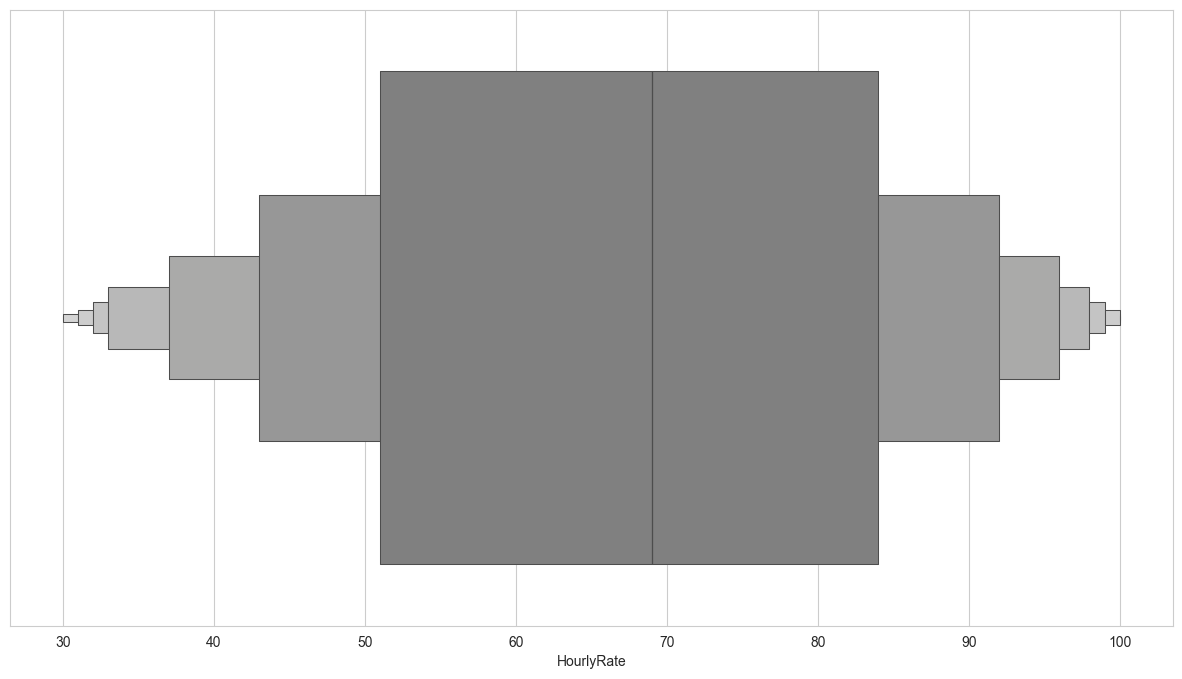

In [377]:
### Boxen Plot checking for outliers

sb.boxenplot(combined_df, x='HourlyRate', color='grey');

no outliers, nice

From Daily Rate and Hourly Rate columns, one can get the hours a worker works daily

In [378]:
## Obtaining daily working hours from daily pay rate and hourly pay rate
combined_df['DailyWorkingHours'] = combined_df['DailyRate'] / combined_df['HourlyRate']

In [379]:
combined_df[['DailyWorkingHours', 'DailyRate', 'HourlyRate']].head()

,DailyWorkingHours,DailyRate,HourlyRate
0,14.261905,599.0,42
1,20.021739,921.0,46
2,8.975000,718.0,80
3,37.200000,1488.0,40
4,27.486486,1017.0,37


Lovely, moving on...

---

#### <u>The `JobInvolvement` column</u>

This column represents the level of involvement the employee has in their job, possibly on a scale from 1 to 4.

In [380]:
combined_df['JobInvolvement'].value_counts()

3    1805
2     649
4     226
1     114
0       1
Name: JobInvolvement, dtype: int64

There is also just one scenerio where we have `0` as a value, almost looking like a data trap to mess up the model😂

---

In [381]:
### Removing the irregularity
combined_df['JobInvolvement'] = combined_df['JobInvolvement'] .apply(lambda x: 1 if x < 1 else x)

In [382]:
### Confirmation
combined_df['JobInvolvement'].value_counts()

3    1805
2     649
4     226
1     115
Name: JobInvolvement, dtype: int64

Lovely!!!

---

#### <u>The `JobLevel` column</u>

This represents the level or rank of the employee's job.

In [383]:
combined_df['JobLevel'].value_counts()

1    1095
2    1029
3     378
4     166
5     126
7       1
Name: JobLevel, dtype: int64

urrghh!!!

In [384]:
combined_df['JobLevel'] = combined_df['JobLevel'].apply(lambda x : 5 if x > 5 else x)

In [385]:
combined_df['JobLevel'].value_counts()

1    1095
2    1029
3     378
4     166
5     127
Name: JobLevel, dtype: int64

---

#### <u>The `JobRole` column</u>

This column represents the role or position of the employee in the organization.

In [386]:
combined_df['JobRole'].value_counts()

Sales Executive              595
Research Scientist           574
Laboratory Technician        563
Manufacturing Director       313
Healthcare Representative    267
Manager                      182
Sales Representative         121
Research Director            117
Human Resources               63
Name: JobRole, dtype: int64

looking moderate🤔

---

#### <u>The `JobSatisfaction` column</u>

This column holds the employee satisfaction with their job, possibly on a scale from 1 to 4.

In [387]:
combined_df['JobSatisfaction'].value_counts()

4    932
3    840
1    519
2    504
Name: JobSatisfaction, dtype: int64

No visible issues here

---

#### <u>The `MaritalStatus` column</u>

This indicates the marital status of the employee (e.g., Single, Married, Divorced).

In [388]:
combined_df['MaritalStatus'].value_counts()

Married     1297
Single       971
Divorced     527
Name: MaritalStatus, dtype: int64

---

#### <u>The `MonthlyIncome` column</u>

This column holds how much each employee earns monthly

In [389]:
combined_df['MonthlyIncome'].describe()

count     2795.000000
mean      6180.385689
std       4535.068382
min        464.000000
25%       2869.000000
50%       4774.000000
75%       7262.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

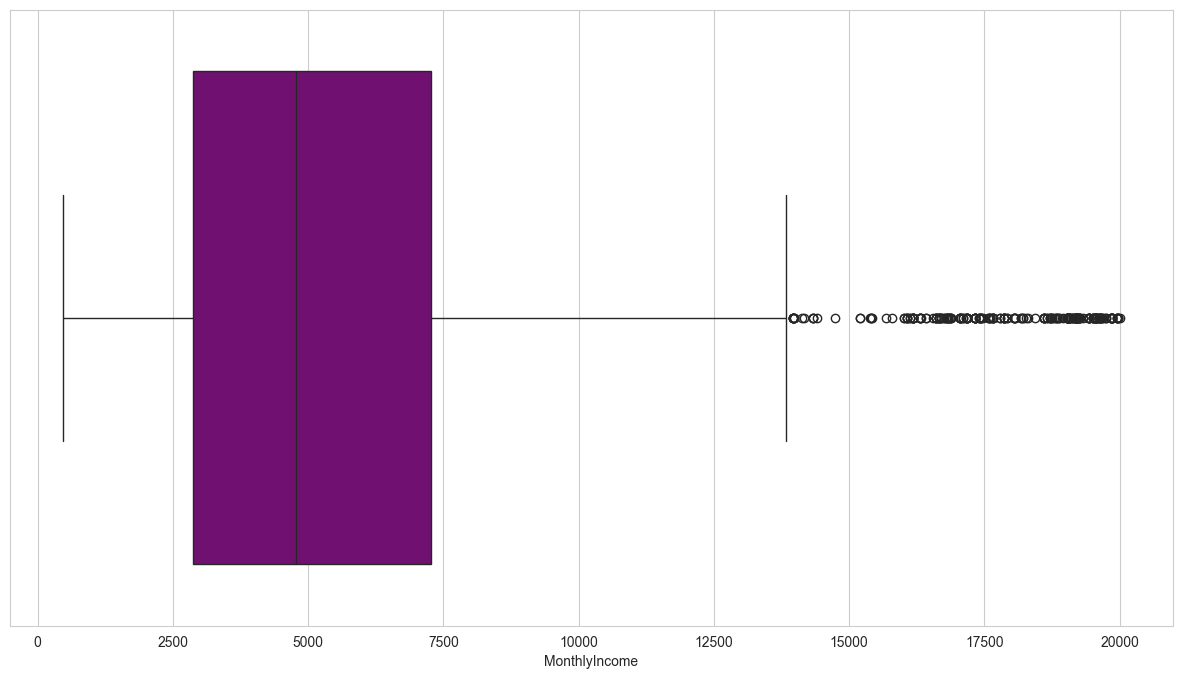

In [390]:
### Checking for outliers using Boxplot

sb.boxplot(combined_df, x='MonthlyIncome', color='purple');

There are many outliers here, representing rare Salaries

#### Age to Monthly Income BarPlot

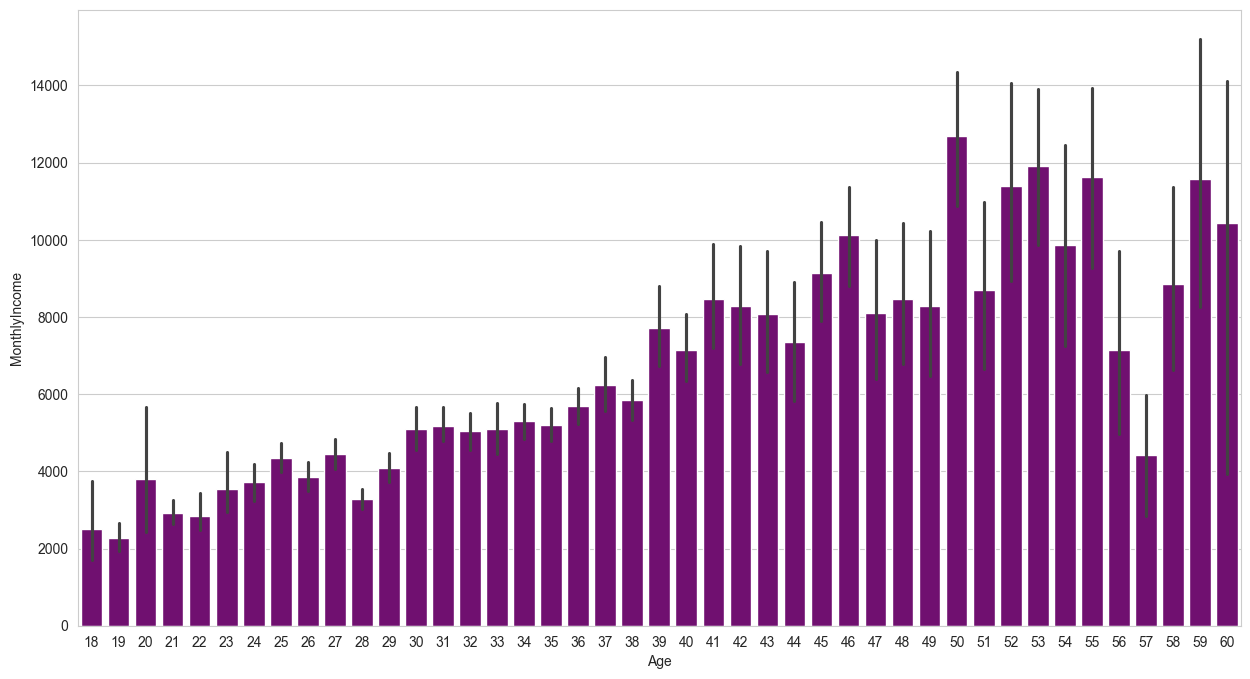

In [391]:
sb.barplot(combined_df, x='Age', y='MonthlyIncome', color='purple', edgecolor='white');

**Plot Inference:**
-    The Higher the Age, the more likely in increase in Monthly Income

--- 

#### <u>The `MonthlyRate` column</u>

This columns represents a rate associated with monthly aspects, possibly financial.

In [392]:
combined_df['MonthlyRate'].describe()

count     2795.000000
mean     14750.127013
std       7032.628231
min        636.000000
25%       8704.500000
50%      15276.000000
75%      20778.500000
max      26999.000000
Name: MonthlyRate, dtype: float64

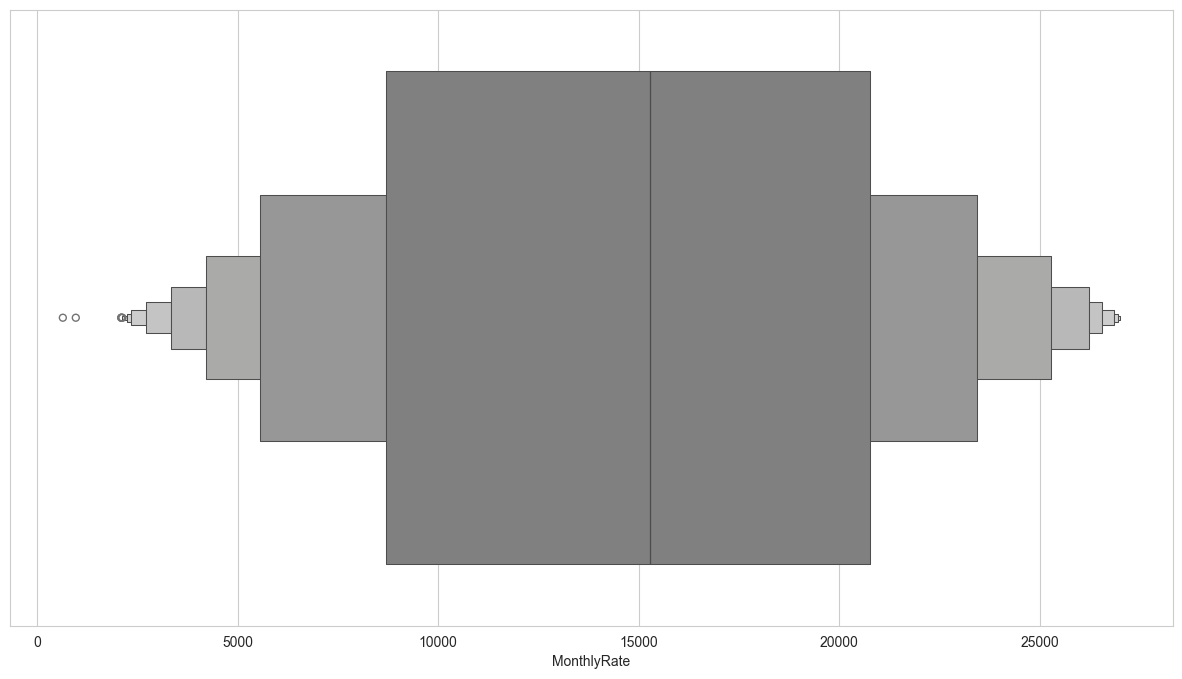

In [393]:
#### Boxen Plot viewing outliers
sb.boxenplot(combined_df, x='MonthlyRate', color='grey');

fairly good!

---

#### <u>The `NumCompaniesWorked` column</u>

This holds information about the number of companies the employee has worked for.

In [394]:
combined_df['NumCompaniesWorked'].value_counts()

1     1032
0      411
3      279
2      275
4      265
7      144
5      111
6      108
9       99
8       70
17       1
Name: NumCompaniesWorked, dtype: int64

There is one person who is said to have worked in `17` companies, lets see more about this person

In [395]:
combined_df[combined_df['NumCompaniesWorked'] == 17]

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,ind,DailyWorkingHours
282,1959,53,Travel_Rarely,571.0,Research & Development,1,4,Medical,3,Male,82,3,2,Healthcare Representative,4,Married,4035,12430,17,Y,No,14,3,2,80,1,17,2,2,5,3,1,2,NaN,1,6.963415


This seems weird, so would be replaced with `9` first

In [396]:
combined_df['NumCompaniesWorked'] = combined_df['NumCompaniesWorked'].apply(lambda x: 9 if x > 9  else x)

Next column--


---

#### <u>The `Over18` column</u>

This column contains a binary indicator if the employee is an adult or not.

In [397]:
combined_df['Over18'].value_counts()

Y    2795
Name: Over18, dtype: int64

Now this is expected, as there are no underaged workers in this dataset ( information from the EDA done on the `Age` column )

since this column carries no valid information, I would say it's best to drop it

In [398]:
combined_df.drop(columns=['Over18'], inplace=True)

---

#### <u>The `OverTime` column</u>

This shows if the employee works overtime or not

In [399]:
combined_df['OverTime'].value_counts()

No     2128
Yes     667
Name: OverTime, dtype: int64

Not as much employees work overtime

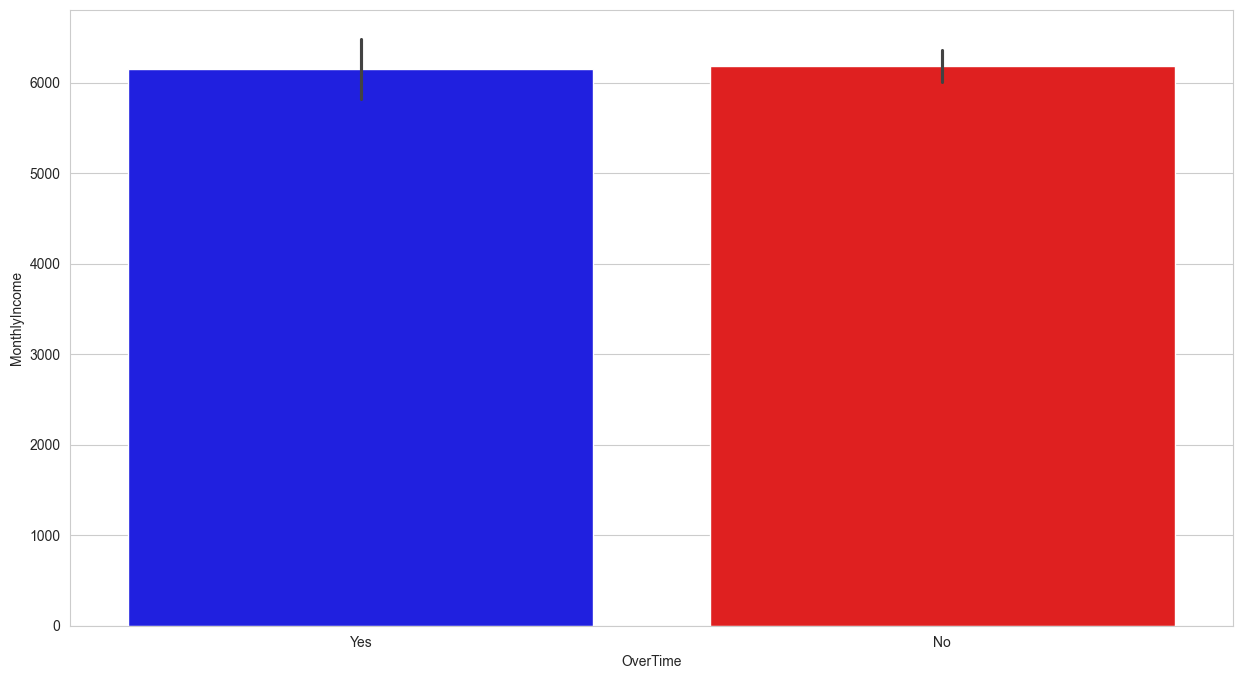

In [400]:
### Bar plot checking how working overtime affects pay
sb.barplot(combined_df, x='OverTime', y='MonthlyIncome', palette=['blue', 'red']);

On average, employees who work overtime and don't, have around the same income

---

#### <u>The `PercentSalaryHike` column</u>

This represents the percentage increase in salary for the employee, it should be a very important factor in determining employee attrition

In [401]:
combined_df['PercentSalaryHike'].describe()

count    2795.000000
mean       14.847943
std         3.412070
min        11.000000
25%        12.000000
50%        14.000000
75%        17.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

In [402]:
### Checking how Percentage Salary Increase contributes to employee attrition
grouped_data = combined_df.groupby('Attrition')['PercentSalaryHike'].mean()
grouped_data

Attrition
0.0    14.944444
1.0    14.610000
Name: PercentSalaryHike, dtype: float64

still around the same range

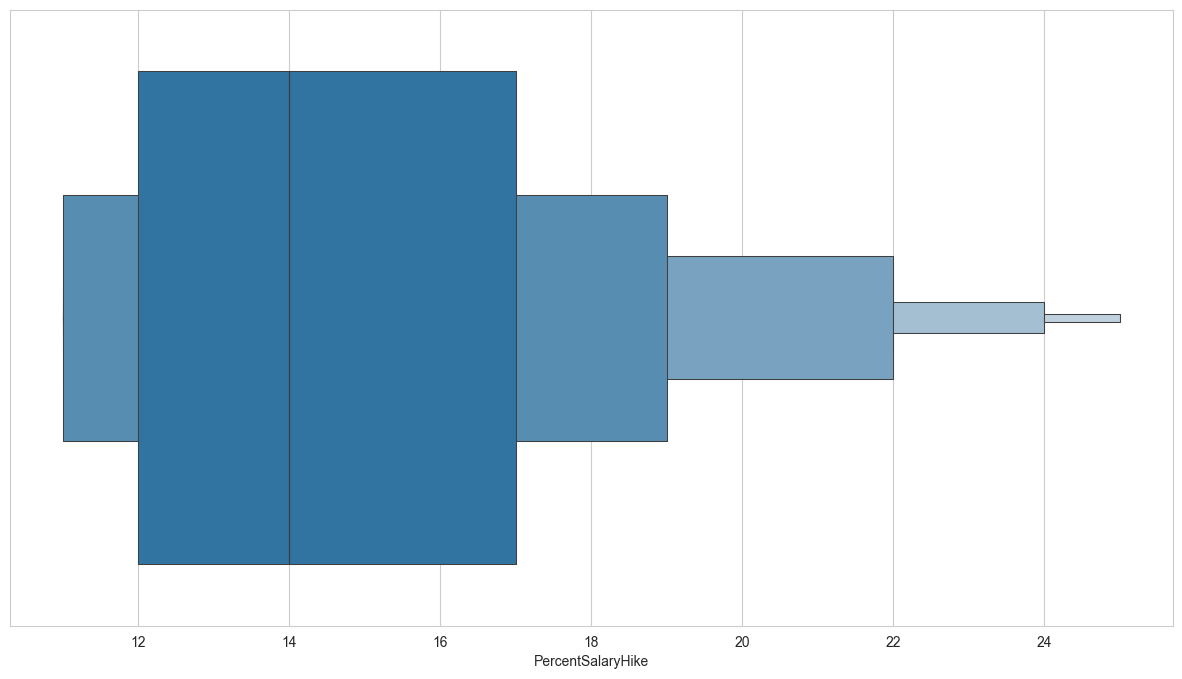

In [403]:
### Boxenplot checking distribtion of values
sb.boxenplot(combined_df, x='PercentSalaryHike');

---

#### <u>The `PerformanceRating` column</u>

This column represents employee Performance

In [404]:
combined_df['PerformanceRating'].value_counts()

3    2459
4     336
Name: PerformanceRating, dtype: int64

Most employees are Performing averagely

---

#### <u>The `RelationshipSatisfaction` column</u>

This represents the employee's satisfaction  with Relationships at work

In [405]:
combined_df['RelationshipSatisfaction'].value_counts()

3    873
4    842
2    592
1    488
Name: RelationshipSatisfaction, dtype: int64

looks cool...


---

#### <u>The `StandardHours` column</u>

This represents the standard working hours of the organization, holding not much information it's best it should be dropped

In [406]:
combined_df.drop(columns=['StandardHours'], inplace=True)

---

#### <u>The `StockOptionLevel` column</u>

This is the level of stock options granted to the employee

In [407]:
combined_df['StockOptionLevel'].value_counts()

0    1225
1    1202
2     249
3     118
4       1
Name: StockOptionLevel, dtype: int64

Just one person granted four stock options?.. Let's see more about this individual

In [408]:
combined_df[combined_df['StockOptionLevel'] == 4]

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,ind,DailyWorkingHours
577,2254,40,Travel_Rarely,1224.0,Research & Development,4,1,Life Sciences,3,Female,45,3,3,Healthcare Representative,4,Married,7756,22266,2,Yes,14,3,1,4,10,5,3,5,4,1,4,NaN,1,27.2


In [409]:
### Replacing this rare case with the maximu ormal value
combined_df['StockOptionLevel'] = combined_df['StockOptionLevel'].apply(lambda x: 3 if x > 3 else x)

---

#### <u>The `TotalWorkingYears` column</u>

This is the total years the employee has been working in the organization

In [410]:
combined_df['TotalWorkingYears'].value_counts()

10    421
6     247
8     215
9     181
7     173
5     173
1     167
4     126
12     89
3      83
15     72
13     65
17     63
16     61
21     61
14     60
20     56
11     52
18     51
2      46
22     41
23     38
19     37
24     32
26     24
28     24
0      23
25     23
31     14
29     13
30     12
27     11
33      9
36      8
32      8
34      6
38      4
37      3
40      1
41      1
35      1
Name: TotalWorkingYears, dtype: int64

In [411]:
### Checking the details of employees who have worked over 30 years
combined_df[combined_df['TotalWorkingYears'] > 30]

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,ind,DailyWorkingHours
4,4,50,Travel_Rarely,1017.0,Research & Development,5,4,Medical,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Yes,13,3,3,0,31,0,3,31,14,4,10,1.0,0,27.486486
22,22,51,Travel_Rarely,1107.0,Human Resources,2,3,Human Resources,1,Male,59,3,5,Manager,3,Married,19943,19982,3,Yes,12,3,4,0,33,2,3,31,9,6,13,0.0,0,18.762712
76,76,54,Travel_Rarely,933.0,Research & Development,4,2,Medical,3,Male,87,3,5,Research Director,4,Single,19513,11806,7,Yes,17,3,4,0,32,2,3,5,4,1,4,0.0,0,10.724138
79,79,35,Travel_Frequently,1396.0,Research & Development,11,1,Life Sciences,1,Female,37,1,4,Manager,4,Married,13348,19757,1,Yes,14,3,3,0,33,3,3,33,10,13,8,1.0,0,37.729730
96,96,53,Travel_Rarely,723.0,Sales,24,3,Marketing,1,Female,66,2,4,Manager,4,Divorced,17856,20338,1,No,11,3,1,1,31,3,3,31,9,15,7,0.0,0,10.954545
167,167,55,Travel_Frequently,1377.0,Research & Development,19,2,Medical,1,Male,58,3,5,Manager,4,Single,19038,7693,3,No,11,3,4,0,37,4,2,24,7,15,11,1.0,0,23.741379
215,215,55,Travel_Rarely,1311.0,Research & Development,1,3,Life Sciences,1,Male,94,3,5,Manager,1,Married,19436,15891,2,No,15,3,2,1,37,1,3,15,6,4,12,0.0,0,13.946809
229,229,52,Travel_Rarely,1445.0,Research & Development,2,4,Medical,3,Female,45,2,5,Research Director,2,Single,19038,19805,1,No,12,3,1,0,34,2,2,34,16,1,1,0.0,0,32.111111
271,271,53,Non-Travel,945.0,Research & Development,6,4,Medical,2,Female,83,2,5,Research Scientist,4,Married,19859,20948,7,No,13,3,1,2,32,2,2,4,3,1,2,0.0,0,11.385542
284,284,58,Travel_Rarely,942.0,Research & Development,10,3,Medical,1,Female,44,4,3,Healthcare Representative,4,Married,10388,13943,8,Yes,16,3,3,1,40,2,2,3,2,1,2,0.0,0,21.409091


There are some Number of working years that dont add up with the employee's age, so these would be worked on

In [412]:
combined_df.drop(columns=['TotalWorkingYears'], inplace=True)

### To be attended to later

#### <u>The `TrainingTimesLastYear` column</u>

This is the number of times the employee was trained the previous year

In [413]:
combined_df['TrainingTimesLastYear'].value_counts()

2    1096
3    1017
4     219
5     209
1      95
0      84
6      75
Name: TrainingTimesLastYear, dtype: int64

Looks fair

---

#### <u>The `WorkLifeBalance` column</u>

This represents the employee's work to personal life balance

In [414]:
combined_df['WorkLifeBalance'].value_counts()

3    1792
2     661
4     230
1     112
Name: WorkLifeBalance, dtype: int64

looks good


---

#### <u>The `YearsAtCompany` column</u>

This is a measure of how many years the employee has spent in the company

In [415]:
combined_df['YearsAtCompany'].value_counts()

5     373
1     345
3     287
10    245
4     193
2     190
8     175
7     165
9     146
6     143
0      93
20     63
11     45
13     45
15     36
22     34
14     32
16     27
12     26
17     21
21     21
18     16
24     15
19     13
31      7
26      6
33      6
29      5
27      5
25      5
30      3
23      3
34      2
37      1
41      1
36      1
32      1
Name: YearsAtCompany, dtype: int64

In [416]:
### Replacing YearsAtCompany whose difference from age is not up to 10 with the mode of the column
for index, row in combined_df.iterrows():
    age = row['Age']
    years = row['YearsAtCompany']
    difference = age - years

    if abs(difference) <= 10:
        # Replace with the mode of the 'YearsAtCompany' column
        combined_df.at[index, 'YearsAtCompany'] = combined_df['YearsAtCompany'].mode().iloc[0]


In [417]:
combined_df['YearsAtCompany'].value_counts()

5     380
1     345
3     285
10    244
4     193
2     190
8     175
7     164
9     146
6     143
0      93
20     63
11     45
13     45
15     36
22     34
14     32
16     27
12     26
21     21
17     21
18     16
24     15
19     13
31      7
26      6
29      5
27      5
33      5
25      5
30      3
23      3
34      2
37      1
36      1
Name: YearsAtCompany, dtype: int64

looks fair

----

#### <u>The `YearsInCurrentRole` column</u>

This is the number of years an employee has spent in thier current role

In [418]:
combined_df['YearsInCurrentRole'].value_counts()

2     701
0     502
7     448
3     270
4     192
8     172
9     125
1      77
6      70
10     58
5      57
11     28
13     26
14     21
12     16
15     10
16      9
17      9
18      4
Name: YearsInCurrentRole, dtype: int64

The values look good, to be affirmed later

---

#### <u>The `YearsSinceLastPromotion` column</u>

This is the number of years since the employee was last promoted

In [419]:
combined_df['YearsSinceLastPromotion'].value_counts()

0     1213
1      669
2      264
7      142
4      126
3       78
5       64
11      56
6       55
9       28
8       24
15      22
12      20
13      16
14      11
10       7
Name: YearsSinceLastPromotion, dtype: int64

looking okay, a bit of visualization to be done later... 

---

#### <u>The `YearsWithCurrManager ` column</u>

This is the number of years the employee has spent with the current manager at this time

In [420]:
combined_df['YearsWithCurrManager'].value_counts()

2     636
0     486
7     434
3     291
8     201
4     179
1     132
9     114
5      60
6      54
11     52
10     46
12     34
13     31
17     17
15     13
14      9
16      6
Name: YearsWithCurrManager, dtype: int64

looks good too

#### <div style='text-align:center'><u>The Target column Finally ('`Attrition`')</u></div>

In [421]:
combined_df['Attrition'].value_counts()

0.0    1476
1.0     200
Name: Attrition, dtype: int64

There  is massive class Imbalance here, which would be handled below:

In [422]:
### seperating train and test data
train_df = combined_df[combined_df['ind'] == 0]
test_df = combined_df[combined_df['ind'] == 1]

In [423]:
train_df.isna().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
ind                         0
DailyWorkingHours           0
dtype: int

In [424]:
print(f"Train Data shape:{train_df.shape}, Test Data shape:{test_df.shape}")

Train Data shape:(1676, 33), Test Data shape:(1119, 33)


In [425]:
### Seperating the positive and negative classes
df_class_0 = train_df[train_df['Attrition'] == 0]
df_class_1 = train_df[train_df['Attrition'] == 1]

print(f"Class 1 shape:{df_class_1.shape}, Class 0 shape:{df_class_0.shape}")

Class 1 shape:(200, 33), Class 0 shape:(1476, 33)


In [426]:
class_0_len = df_class_0.shape[0]
class_1_len = df_class_1.shape[0]

In [427]:
df_class_1_up = df_class_1.sample(class_0_len, replace=True)
df_class_1_up.shape

(1476, 33)

In [428]:
train_df = pd.concat([df_class_0, df_class_1_up], axis=0)
train_df.shape

(2952, 33)

In [429]:
train_df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,ind,DailyWorkingHours
0,0,36,Travel_Frequently,599.0,Research & Development,24,3,Medical,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Yes,13,3,2,1,2,3,10,0,7,8,0.0,0,14.261905
1,1,35,Travel_Rarely,921.0,Sales,8,3,Other,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,No,17,3,4,1,3,3,4,2,0,3,0.0,0,20.021739
2,2,32,Travel_Rarely,718.0,Sales,26,3,Marketing,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,No,17,3,4,2,3,3,3,2,1,2,0.0,0,8.975000
3,3,38,Travel_Rarely,1488.0,Research & Development,2,3,Medical,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,No,14,3,3,0,1,1,6,0,0,2,0.0,0,37.200000
5,5,27,Travel_Rarely,566.0,Research & Development,2,3,Other,3,Female,56,3,2,Manufacturing Director,2,Single,4197,7103,5,No,11,3,4,0,0,3,1,0,1,0,0.0,0,10.107143


In [430]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2952 entries, 0 to 203
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        2952 non-null   int64  
 1   Age                       2952 non-null   int64  
 2   BusinessTravel            2952 non-null   object 
 3   DailyRate                 2952 non-null   float64
 4   Department                2952 non-null   object 
 5   DistanceFromHome          2952 non-null   int64  
 6   Education                 2952 non-null   int64  
 7   EducationField            2952 non-null   object 
 8   EnvironmentSatisfaction   2952 non-null   int64  
 9   Gender                    2952 non-null   object 
 10  HourlyRate                2952 non-null   int64  
 11  JobInvolvement            2952 non-null   int64  
 12  JobLevel                  2952 non-null   int64  
 13  JobRole                   2952 non-null   object 
 14  JobSatisf

---

#### <u> Correlation Matrix </u>

We dont want highly corrolated columns in our data, so our model doesn't underfit
Let's go ahead to use a heatmap to view thier correlation, and remove any highly correlated columns;

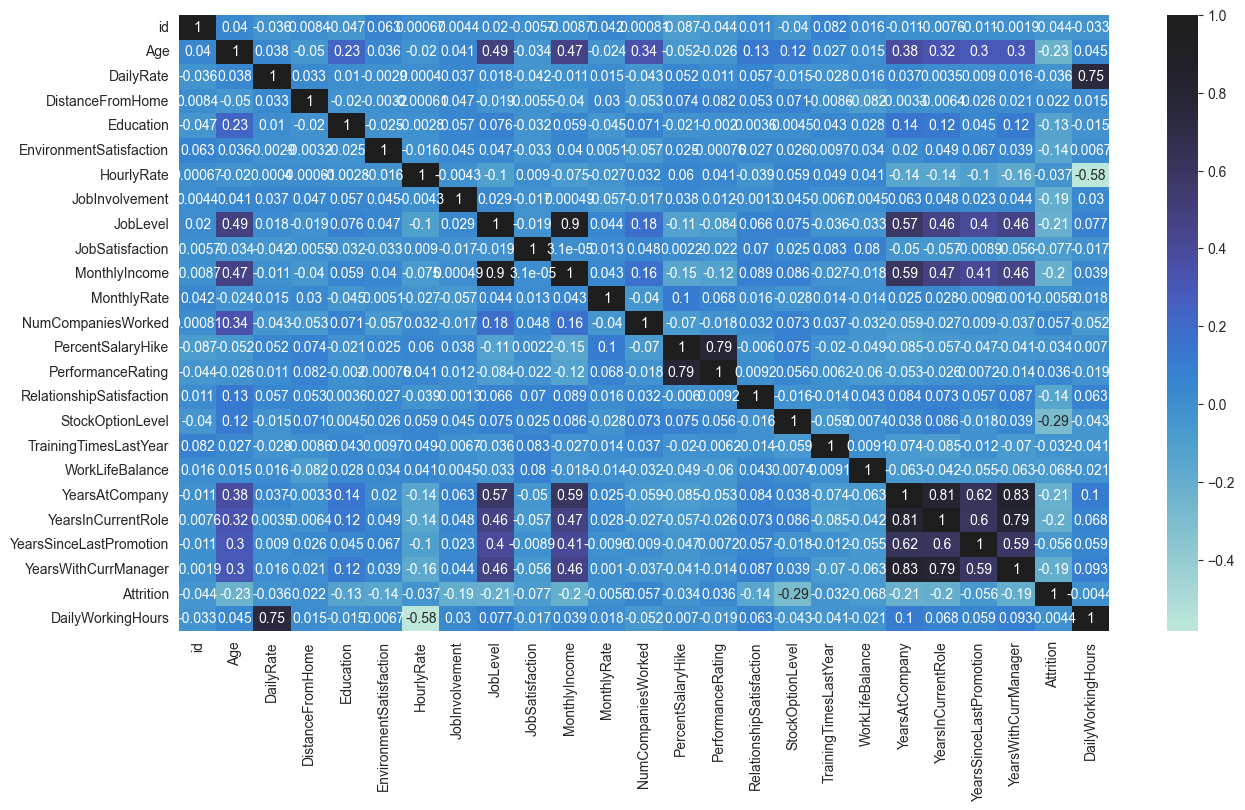

In [431]:
plt.figure(figsize=(15,8))
sb.heatmap(train_df.drop(columns=['ind']).corr(), annot=True, center=1);

In [432]:
### Dropping highly correlated Columns
# train_df.drop(columns=['DailyRate', 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','MonthlyIncome','PercentSalaryHike'], inplace=True)

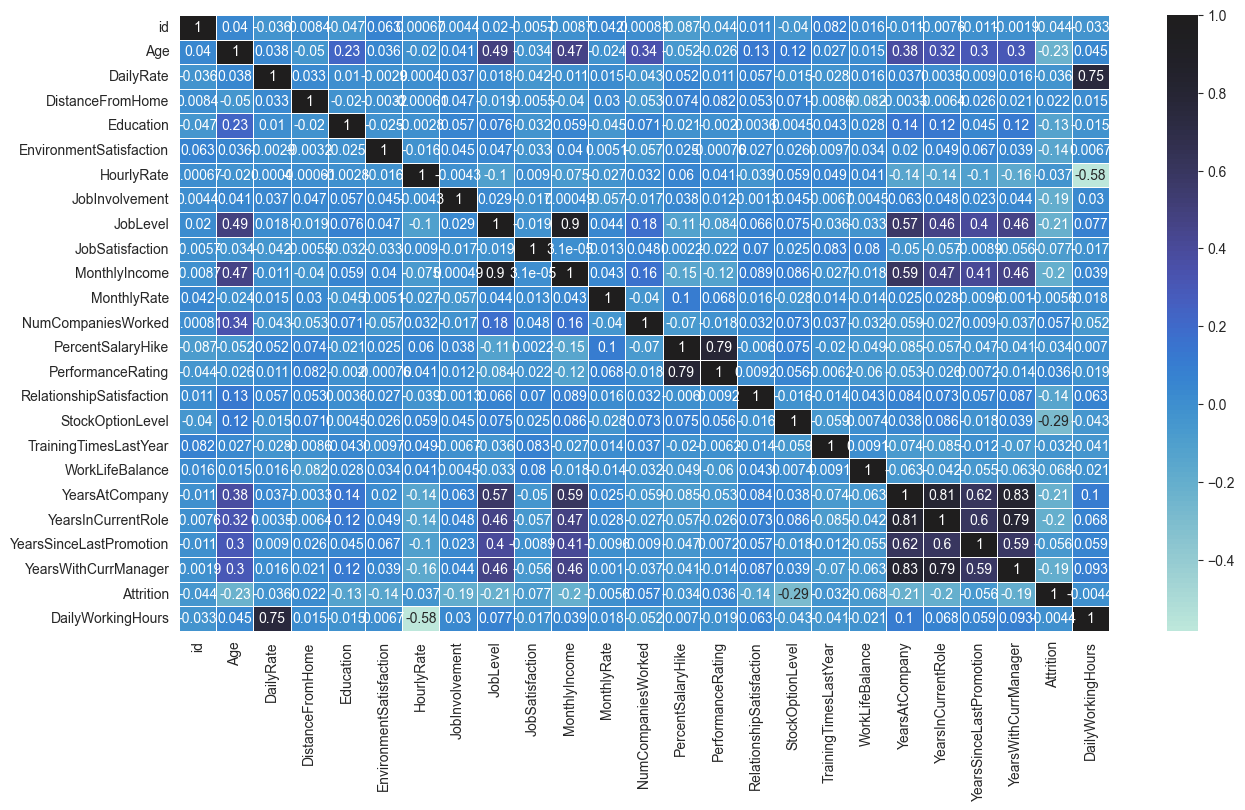

In [433]:
### Verifing they have been removed
plt.figure(figsize=(15,8))
sb.heatmap(train_df.drop(columns=['ind']).corr(), annot=True, center=1,linewidths=0.5);

**Phew 😮‍💨.. Data Cleaning was such a hurdle, with so much Features**

In [434]:
### dropping the `id` column in the train_data, because there is nothing for the model to learn in it
train_df.drop(columns=['id'], inplace=True)
# train_df.drop(columns=['id','PercentSalaryHike','JobRole', 'YearsSinceLastPromotion','YearsInCurrentRole','YearsWithCurrManager','Department'], inplace=True)

### <div style='text-decoration:underline;text-align:center'>Data Preprocessing</div>

In [435]:
## Seperating categorical features from numerical features
cat_cols = []
for x in train_df.drop(columns=['Attrition','ind']).columns:
    if train_df[x].nunique() <= 20:
        cat_cols.append(x)
    else:
        pass
    
num_cols = []
for x in train_df.drop(columns=['Attrition','ind']).columns:
    if x in cat_cols:
        pass
    else:
        num_cols.append(x)

In [436]:
print("Numerical Features are:\n","===="*10,"\n",num_cols)
print("\n")
print("Categorical Features are:\n","===="*10,"\n",cat_cols)

Numerical Features are:
 ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'YearsAtCompany', 'DailyWorkingHours']


Categorical Features are:
 ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


---

#### <u>Splitting Training data into train and Validation set</u>

In [437]:
train_df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition', 'ind', 'DailyWorkingHours'],
      dtype='object')

In [438]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler, MinMaxScaler, LabelEncoder

# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler = StandardScaler()
encoder = LabelEncoder()

for col in cat_cols:
    train_df[col] = encoder.fit_transform(train_df[col])


train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
# X_val[num_cols] = scaler.transform(X_val[num_cols])

In [439]:
from sklearn.model_selection import train_test_split

In [440]:
X = train_df.drop(columns=['Attrition','ind'], axis=1)
y = train_df['Attrition']

In [441]:
X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=0.4, stratify=y, random_state=42)

In [442]:
# from sklearn.compose import ColumnTransformer

# preprocessor = ColumnTransformer(
#     transformers = [('cat',encoder,cat_cols),
#                    ('num', scaler, num_cols)]
#     ,
#     remainder='passthrough'
# )

In [443]:
# X_train_preprocessed = preprocessor.fit_transform(X_train)

In [444]:
# X_test_preprocessed = preprocessor.transform(X_val)

In [445]:
# X_train = pd.DataFrame(X_train_preprocessed, columns=preprocessor.get_feature_names_out())
# X_val = pd.DataFrame(X_test_preprocessed, columns=preprocessor.get_feature_names_out())

In [446]:
#Inspecting 
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1771 entries, 550 to 765
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1771 non-null   float64
 1   BusinessTravel            1771 non-null   int32  
 2   DailyRate                 1771 non-null   float64
 3   Department                1771 non-null   int32  
 4   DistanceFromHome          1771 non-null   float64
 5   Education                 1771 non-null   int64  
 6   EducationField            1771 non-null   int32  
 7   EnvironmentSatisfaction   1771 non-null   int64  
 8   Gender                    1771 non-null   int32  
 9   HourlyRate                1771 non-null   float64
 10  JobInvolvement            1771 non-null   int64  
 11  JobLevel                  1771 non-null   int64  
 12  JobRole                   1771 non-null   int32  
 13  JobSatisfaction           1771 non-null   int64  
 14  Marital

#### <u>Checking for Highly Correlated Columns after preprocessing</u>

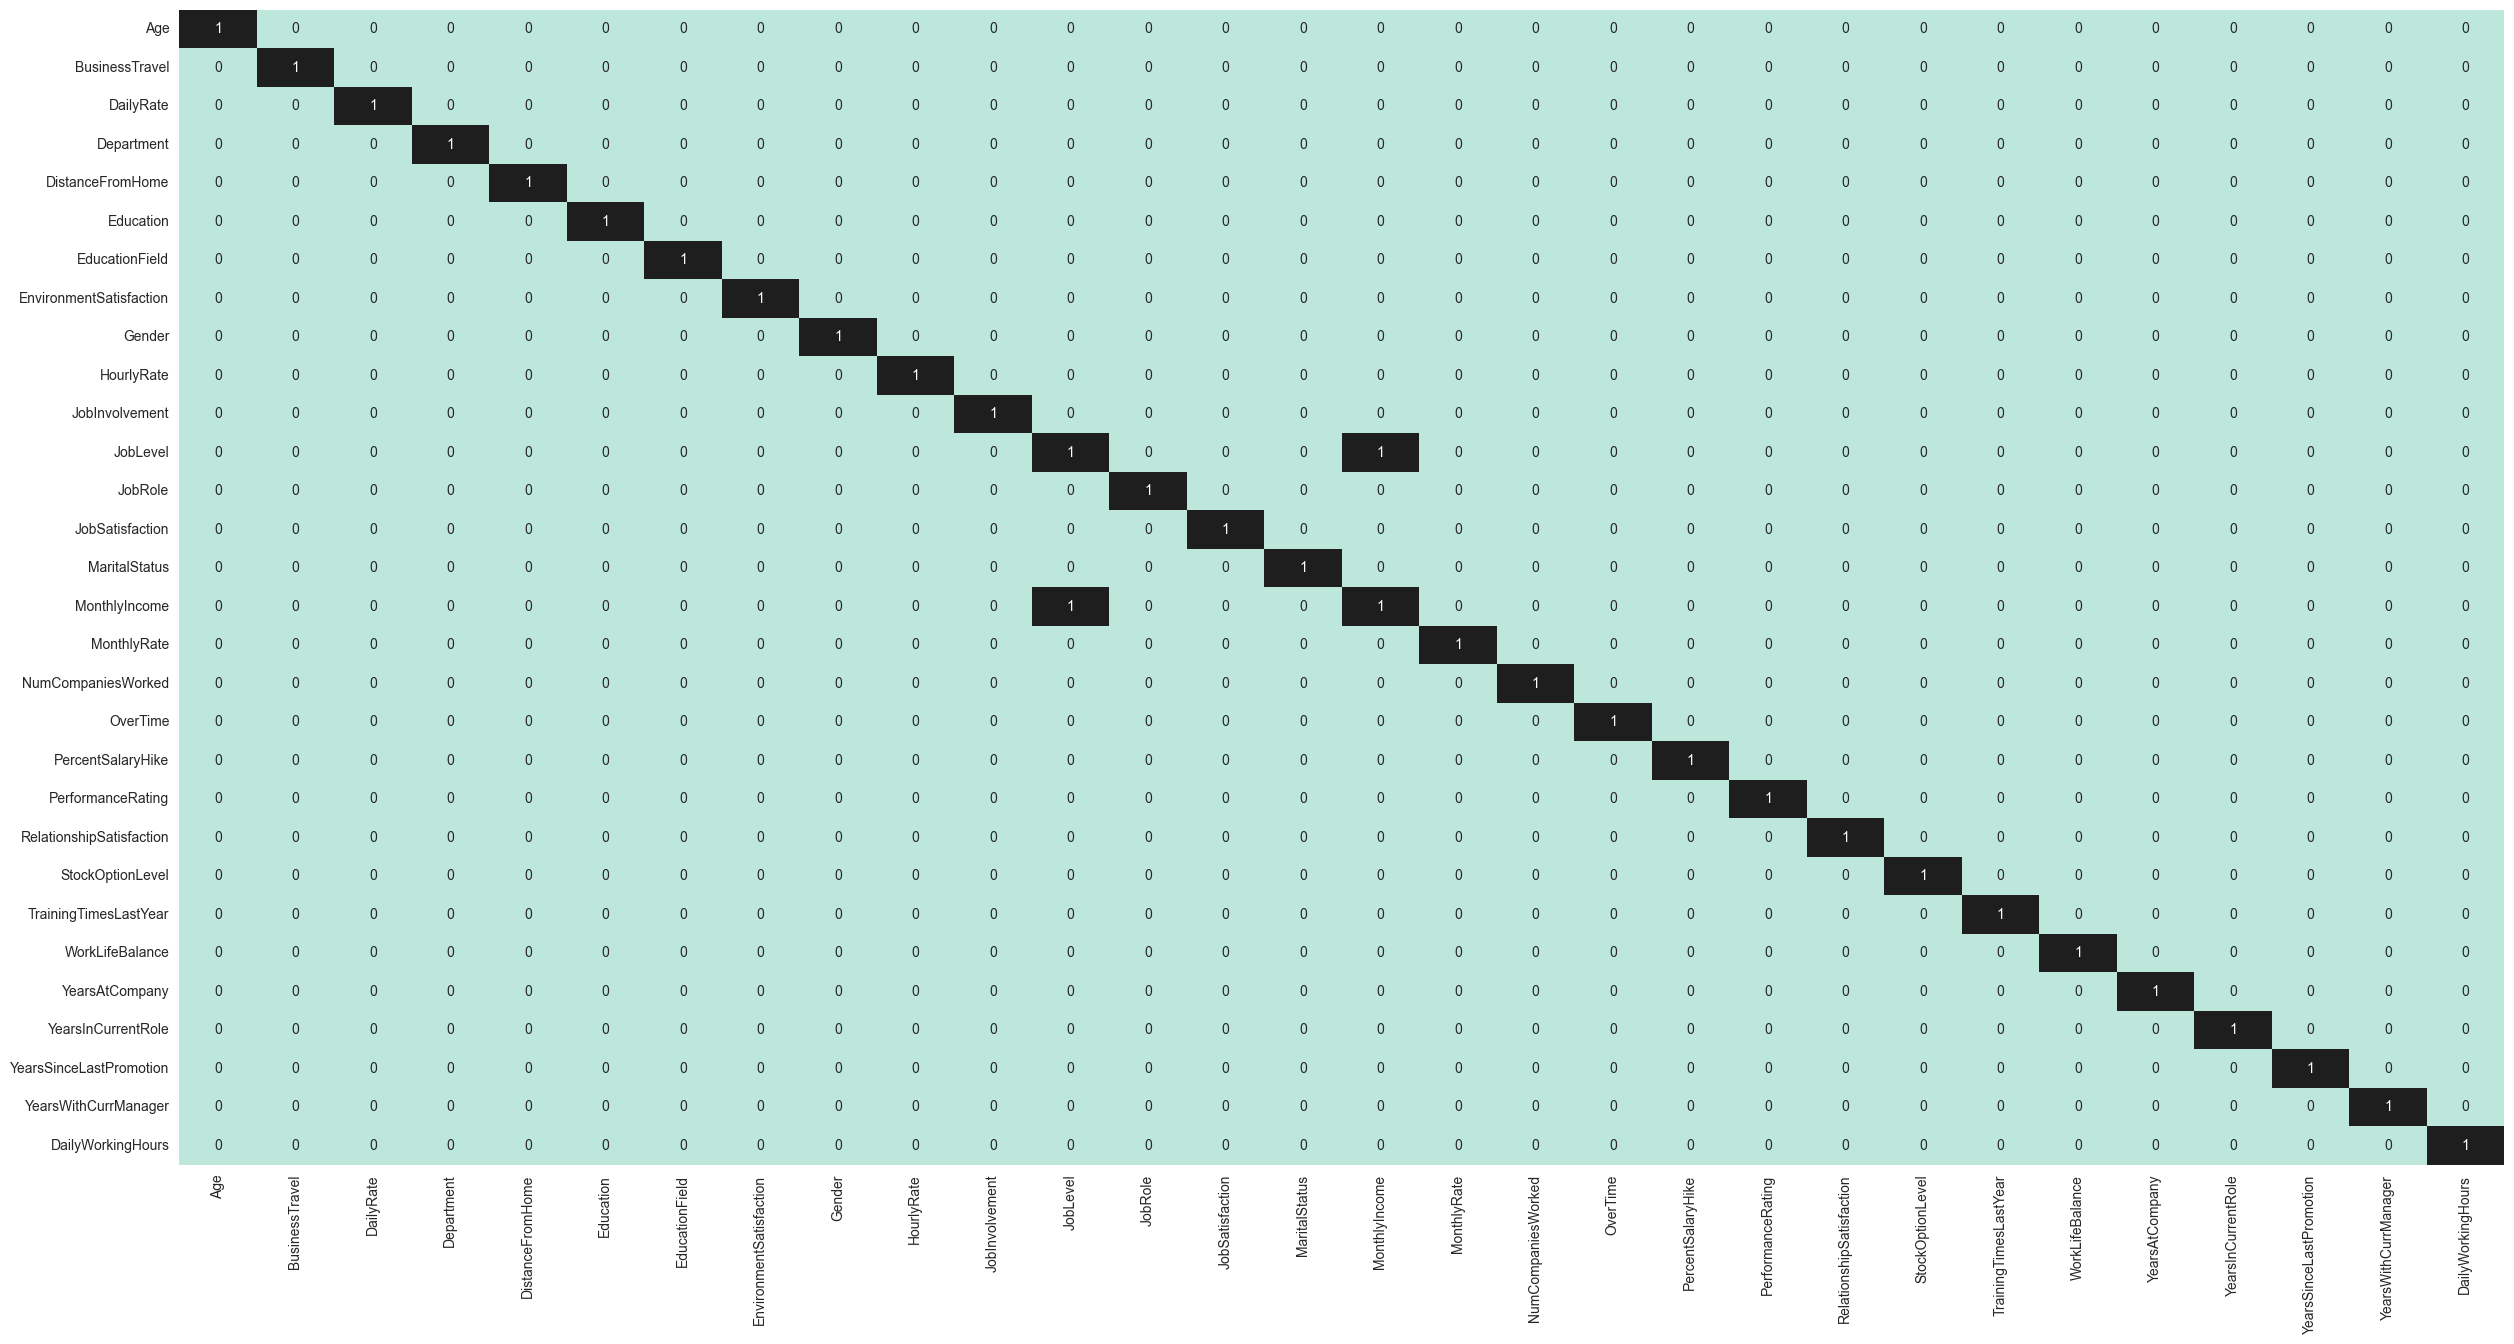

In [447]:
plt.figure(figsize=(30,15))
sb.heatmap(X_train.corr()>0.9 , annot = True, cbar= False, center=1);

In [448]:
# ## Drooping the very highly correlated column
# X_train.drop(columns=['cat__Department_Human Resources'], inplace=True)
# X_val.drop(columns=['cat__Department_Human Resources'], inplace=True)

X_train.drop(columns=['JobLevel'], inplace=True)
X_val.drop(columns=['JobLevel'], inplace=True)

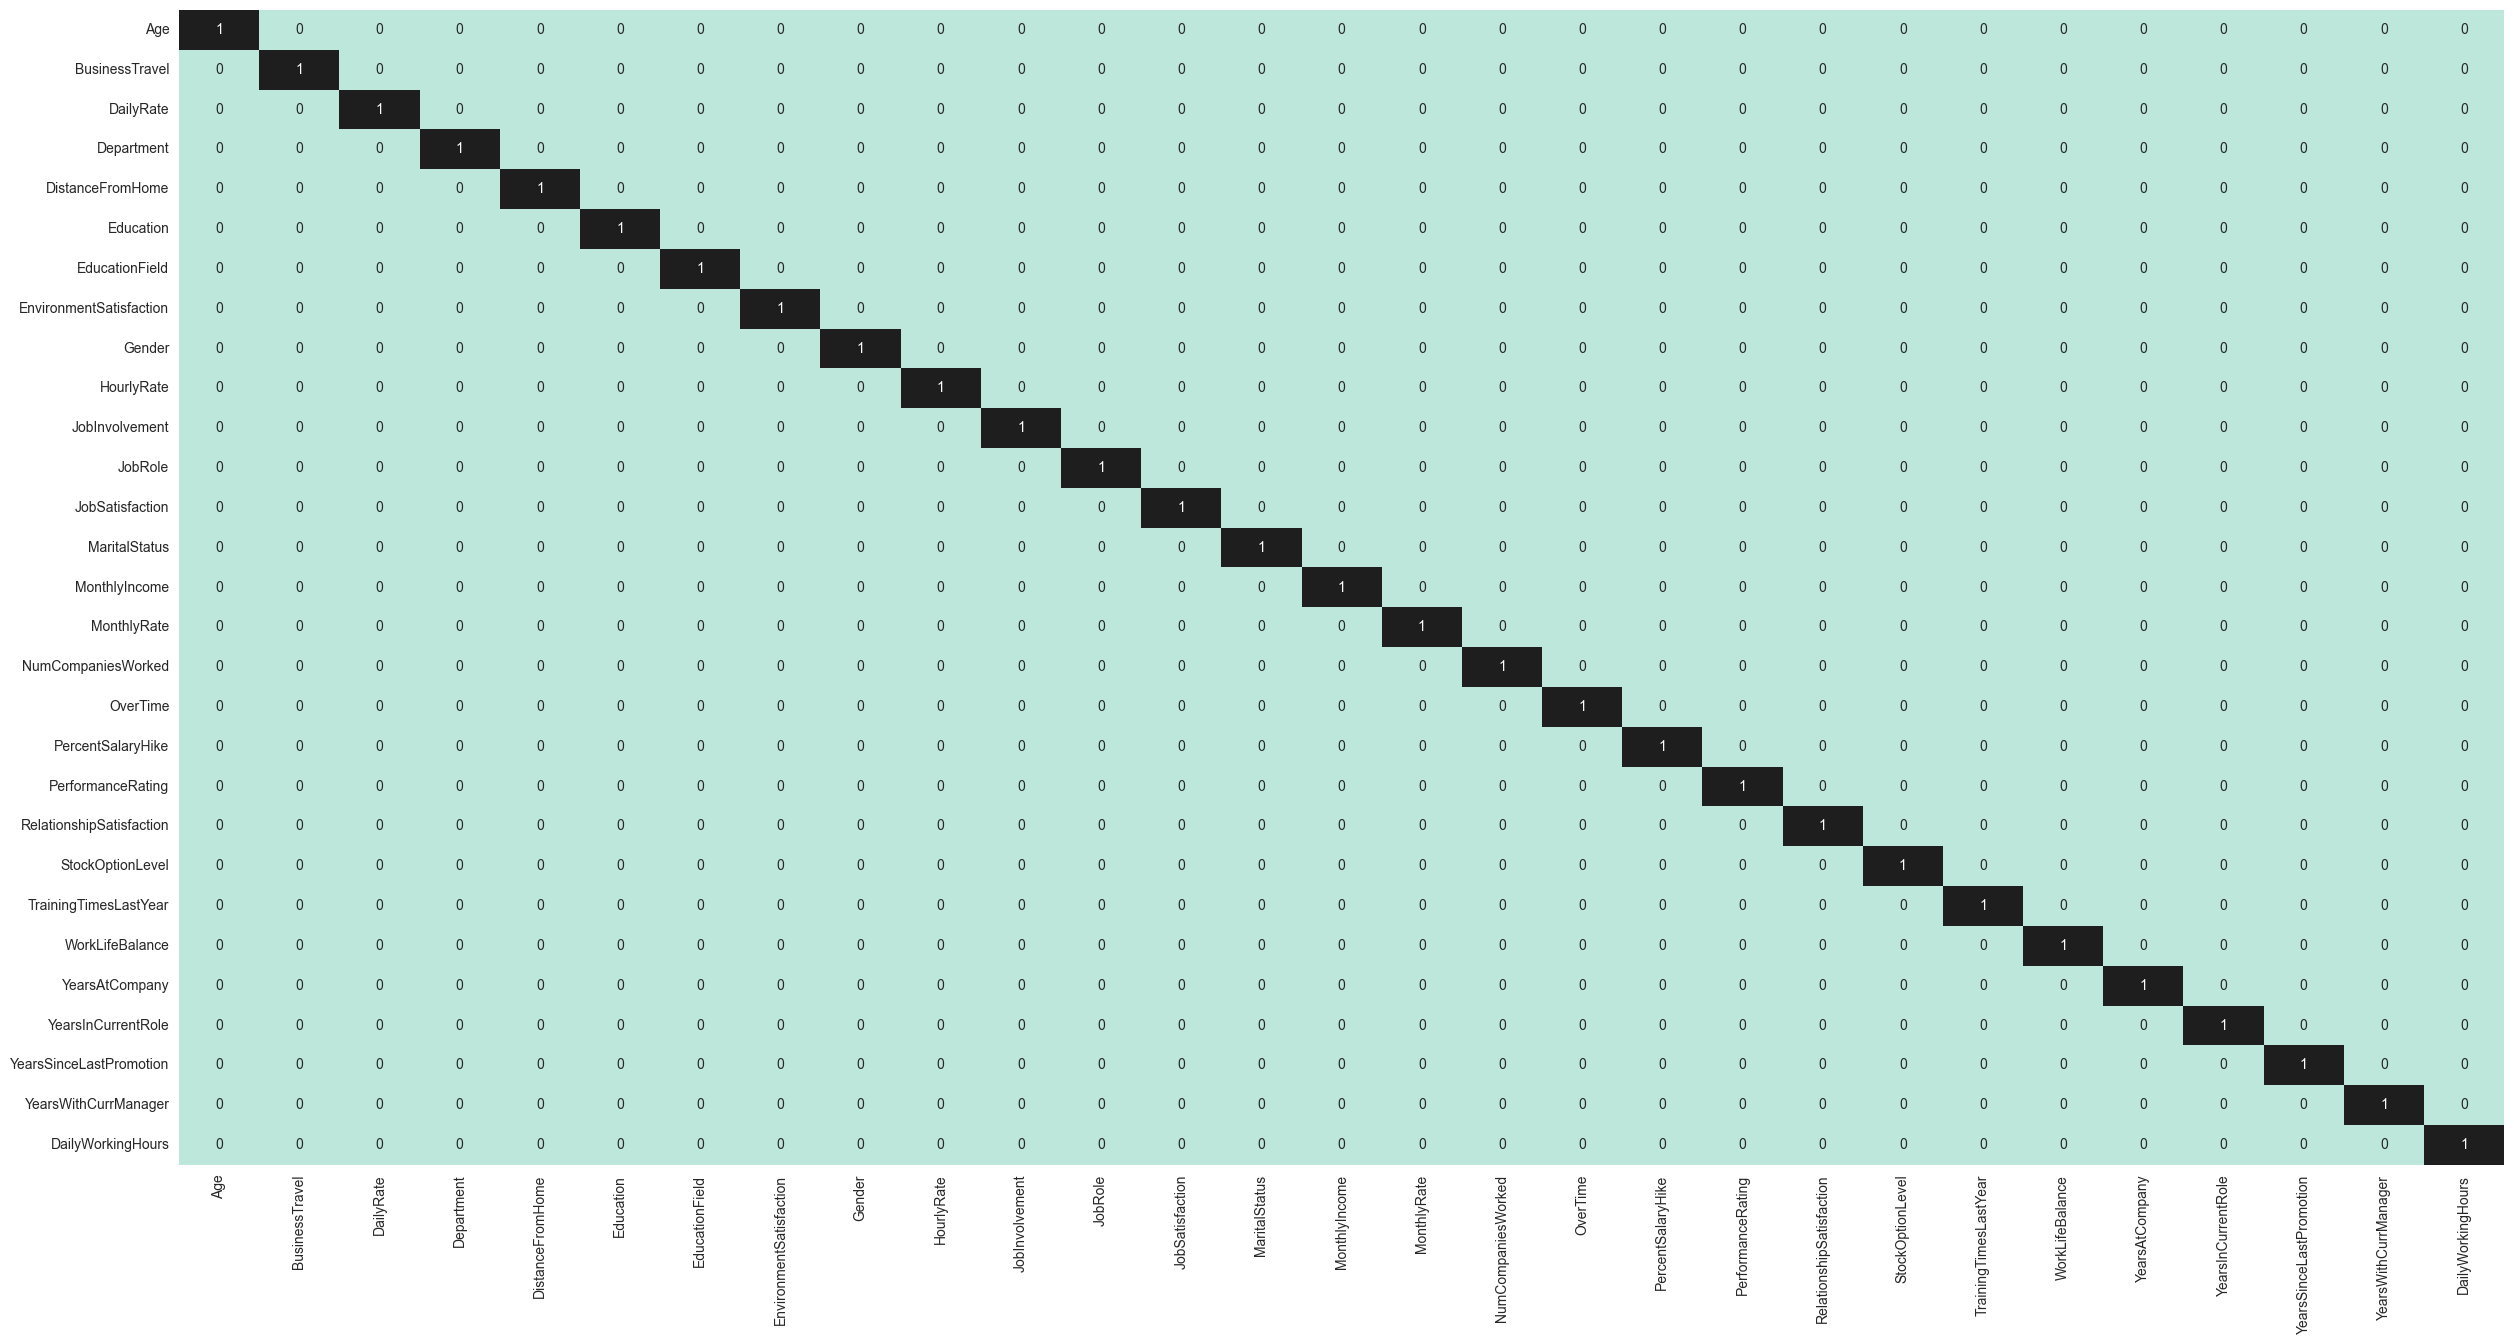

In [449]:
plt.figure(figsize=(30,15))
sb.heatmap(X_train.corr()>0.9 , annot = True, cbar= False, center=1);

In [451]:
print(f"X_train shape: {X_train.shape}, X_test shape: {X_val.shape}")

X_train shape: (1771, 29), X_test shape: (1181, 29)


In [452]:
X_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyWorkingHours
550,-0.302955,1,-1.337798,1,-1.010470,2,3,0,0,0.342326,2,6,3,2,-0.523489,-1.597296,3,1,0,0,2,0,3,2,-0.682787,2,2,2,-1.119938
246,0.166938,2,-1.419545,1,-0.880666,1,1,2,1,-0.995668,2,2,3,2,-0.428690,1.053670,3,0,1,0,1,0,2,3,-1.036865,0,0,0,-0.848260
1665,-0.890321,2,-0.975385,1,1.326012,0,3,1,1,-1.150052,2,2,2,0,-0.801963,0.428709,1,0,3,0,1,3,1,2,-0.859826,0,0,0,-0.345994
129,0.636831,0,-0.288710,1,-0.361448,3,3,1,0,-0.223749,2,0,0,1,0.279801,1.197643,3,0,4,0,3,1,5,1,-0.151671,4,1,2,-0.263218
1144,-0.655375,2,1.280835,1,1.845230,1,1,0,1,-0.378133,2,6,2,2,-0.596640,1.059838,1,1,6,0,0,0,2,0,0.733524,0,0,8,0.981424


In [453]:
X_val.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyWorkingHours
966,-1.242741,2,-1.149779,1,-0.880666,0,3,3,0,0.548171,2,2,2,1,-0.620568,-1.066402,1,0,2,0,0,1,3,2,-0.859826,0,0,0,-1.045084
563,-0.420428,2,1.321708,1,-0.231643,2,1,2,0,1.525936,2,2,0,1,-0.731319,-0.868315,1,0,1,0,0,1,2,2,-0.859826,0,0,0,-0.046228
437,1.224197,2,-1.490392,2,-0.880666,1,3,2,1,0.959861,2,7,3,1,-0.009384,-1.091916,4,1,2,0,0,0,3,1,0.379446,7,7,0,-1.288880
1288,-0.772848,2,0.060078,1,0.027966,2,5,1,1,0.856939,2,2,0,2,-0.719925,0.567496,1,0,11,1,0,0,4,1,0.202407,7,6,7,-0.452268
595,-0.302955,1,0.185424,1,1.455816,2,5,3,1,-0.841284,2,2,2,1,-0.406585,-0.209289,1,0,7,0,2,3,2,2,0.733524,7,0,7,0.505159


### <u> Model Training </u> 

In [454]:
### Dictionary to host model performance for eventual analysis
perf_dic = {}

In [455]:
### Importing Performance Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report,confusion_matrix

In [456]:
### Helper function to make model training nd evaluation easy

from sklearn.model_selection import cross_val_score

def check_cross_perf(model, name):
    cv_scores = cross_val_score(model, X_val, Y_val, cv=5, scoring='roc_auc')
    print(f"{name} Cross-validation Accuracy Scores:", cv_scores)

    mean_accuracy = cv_scores.mean()
    print("Mean Accuracy:", mean_accuracy, "\n")
    return mean_accuracy

def predict_report(model,model_name, X_train=X_train,X_val=X_val, Y_val=Y_val, Y_train=Y_train):
    perf_lst = []
    temp_dict = {model_name:perf_lst}
    model.fit(X_train, Y_train)
    ### Model Performance on Data it has seen
    train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, train_predictions)
    train_roc_auc = roc_auc_score(Y_train, train_predictions)
    train_f1 = accuracy_score(Y_train, train_predictions)
    print(f'The accuracy score of our model on the Training set is: {train_accuracy * 100 : 2f}%')
    print(f'The ROC-AUC score of our model on the Training set is: {train_roc_auc * 100 : 2f}%')
    print(f'The F1 score of our model on the Training set is: {train_f1*100 : 2f}%', '\n\n')
    
    ### Model Performance on Data it has not seen
    val_predictions = model.predict(X_val)
    val_accuracy = accuracy_score(Y_val, val_predictions)
    val_roc_auc = roc_auc_score(Y_val, val_predictions)
    val_f1 = accuracy_score(Y_val, val_predictions)
    perf_lst.append(f'{val_accuracy*100:.2f}%')
    perf_lst.append(f'{val_roc_auc*100:.2f}%')
    perf_lst.append(f'{val_f1*100:.2f}%')
    perf_lst.append(f'{check_cross_perf(model, model_name)*100:.2f}%')
    print(f'The accuracy score of our model on the Validation set is: {val_accuracy * 100 : 2f}%')
    print(f'The ROC-AUC score of our model on the Validation set is: {val_roc_auc * 100 : 2f}%')
    print(f'The F1 score of our model on the Validation set is: {val_f1*100 : 2f}%', '\n\n')
    
    ### Cross validation score
    check_cross_perf(model, model_name)
    
    print('Classification report on Validation set')
    print(classification_report(Y_val, val_predictions))
    
    plt.figure(figsize=(15,8))
    sb.heatmap(confusion_matrix(Y_val, val_predictions, normalize='true'), annot=True, cmap='coolwarm_r')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.title("Confusion Matrix on Model Performance over Val dataset")
    perf_dic.update(temp_dict)

---

### Building a Baseline Model with Logistic Regression

The accuracy score of our model on the Training set is:  75.155280%
The ROC-AUC score of our model on the Training set is:  75.155080%
The F1 score of our model on the Training set is:  75.155280% 


LogisticRegression Cross-validation Accuracy Scores: [0.84760006 0.75553002 0.79754381 0.81758115 0.84070669]
Mean Accuracy: 0.8117923469301539 

The accuracy score of our model on the Validation set is:  73.835732%
The ROC-AUC score of our model on the Validation set is:  73.837076%
The F1 score of our model on the Validation set is:  73.835732% 


LogisticRegression Cross-validation Accuracy Scores: [0.84760006 0.75553002 0.79754381 0.81758115 0.84070669]
Mean Accuracy: 0.8117923469301539 

Classification report on Validation set
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73       591
         1.0       0.73      0.75      0.74       590

    accuracy                           0.74      1181
   macro avg       0.74      0.74      0.74 

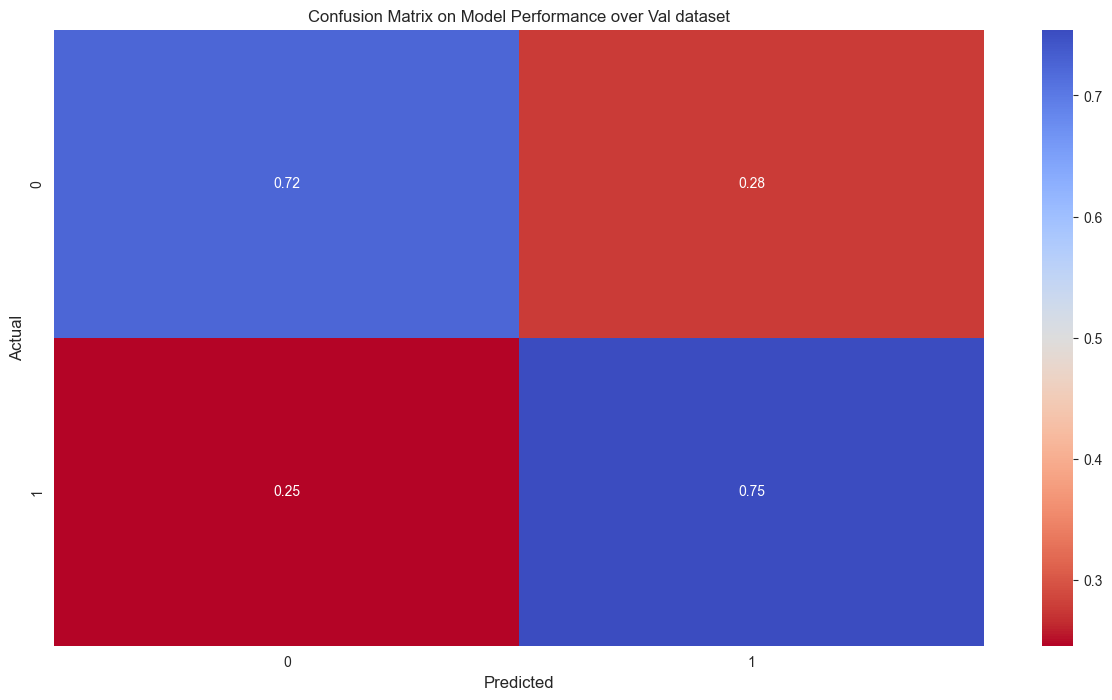

In [457]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
predict_report(lr, 'LogisticRegression')


**Getting Feature Importance of the lr Model**

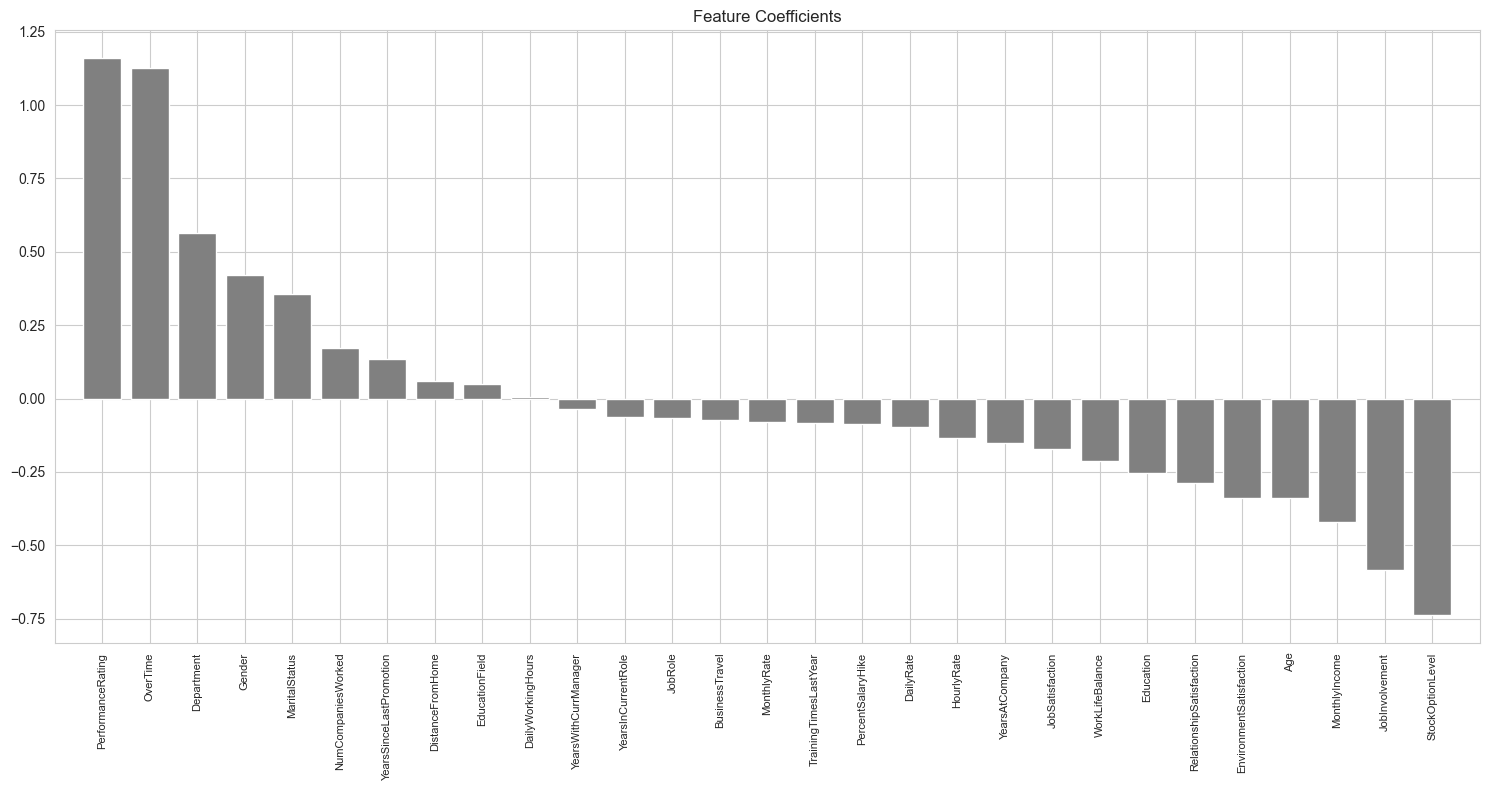

In [458]:
coefficients = lr.coef_[0]
feature_names = X_train.columns

# Sort coefficients in descending order
indices = coefficients.argsort()[::-1]

# Visualization
plt.figure(figsize=(15, 8))
plt.title("Feature Coefficients")
plt.bar(range(X_train.shape[1]), coefficients[indices], align="center",color = 'grey')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90,fontsize=8)
plt.xticks(fontsize=8)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

### XGBoost Algorithm

The accuracy score of our model on the Training set is:  100.000000%
The ROC-AUC score of our model on the Training set is:  100.000000%
The F1 score of our model on the Training set is:  100.000000% 


XGBoost Cross-validation Accuracy Scores: [0.96019086 0.91762425 0.95719621 0.9824763  0.97062626]
Mean Accuracy: 0.9576227733265096 

The accuracy score of our model on the Validation set is:  96.020322%
The ROC-AUC score of our model on the Validation set is:  96.022972%
The F1 score of our model on the Validation set is:  96.020322% 


XGBoost Cross-validation Accuracy Scores: [0.96019086 0.91762425 0.95719621 0.9824763  0.97062626]
Mean Accuracy: 0.9576227733265096 

Classification report on Validation set
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       591
         1.0       0.93      0.99      0.96       590

    accuracy                           0.96      1181
   macro avg       0.96      0.96      0.96      1181
weighted 

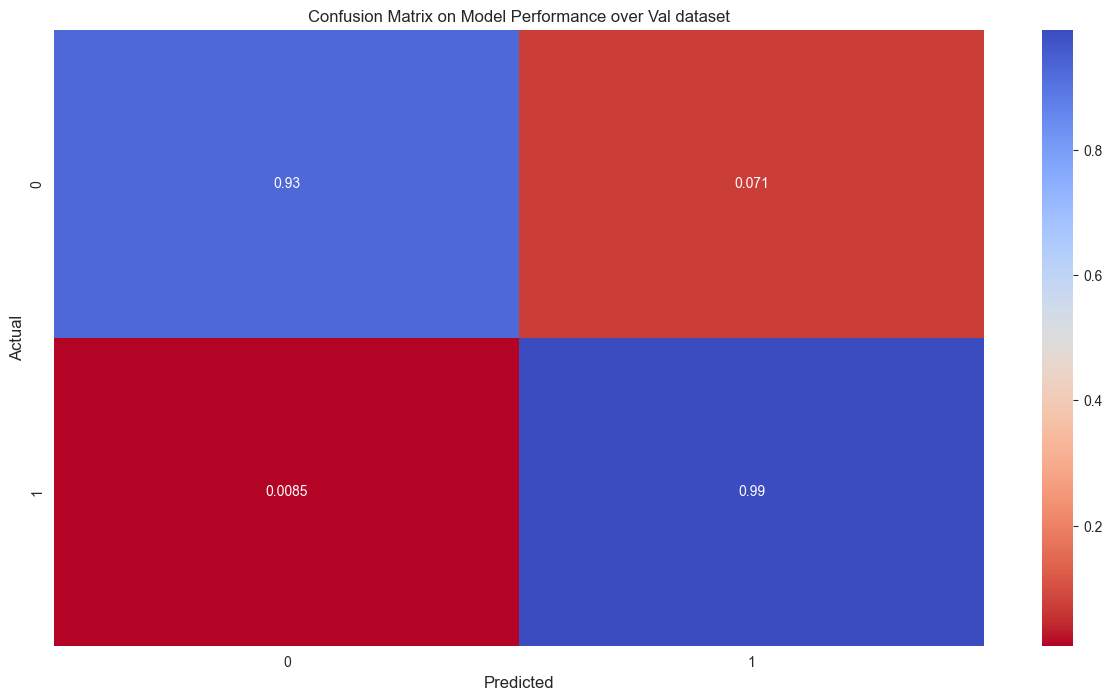

In [459]:
from xgboost import XGBClassifier

xgbmodel = XGBClassifier(n_jobs=-1)
predict_report(xgbmodel, 'XGBoost')

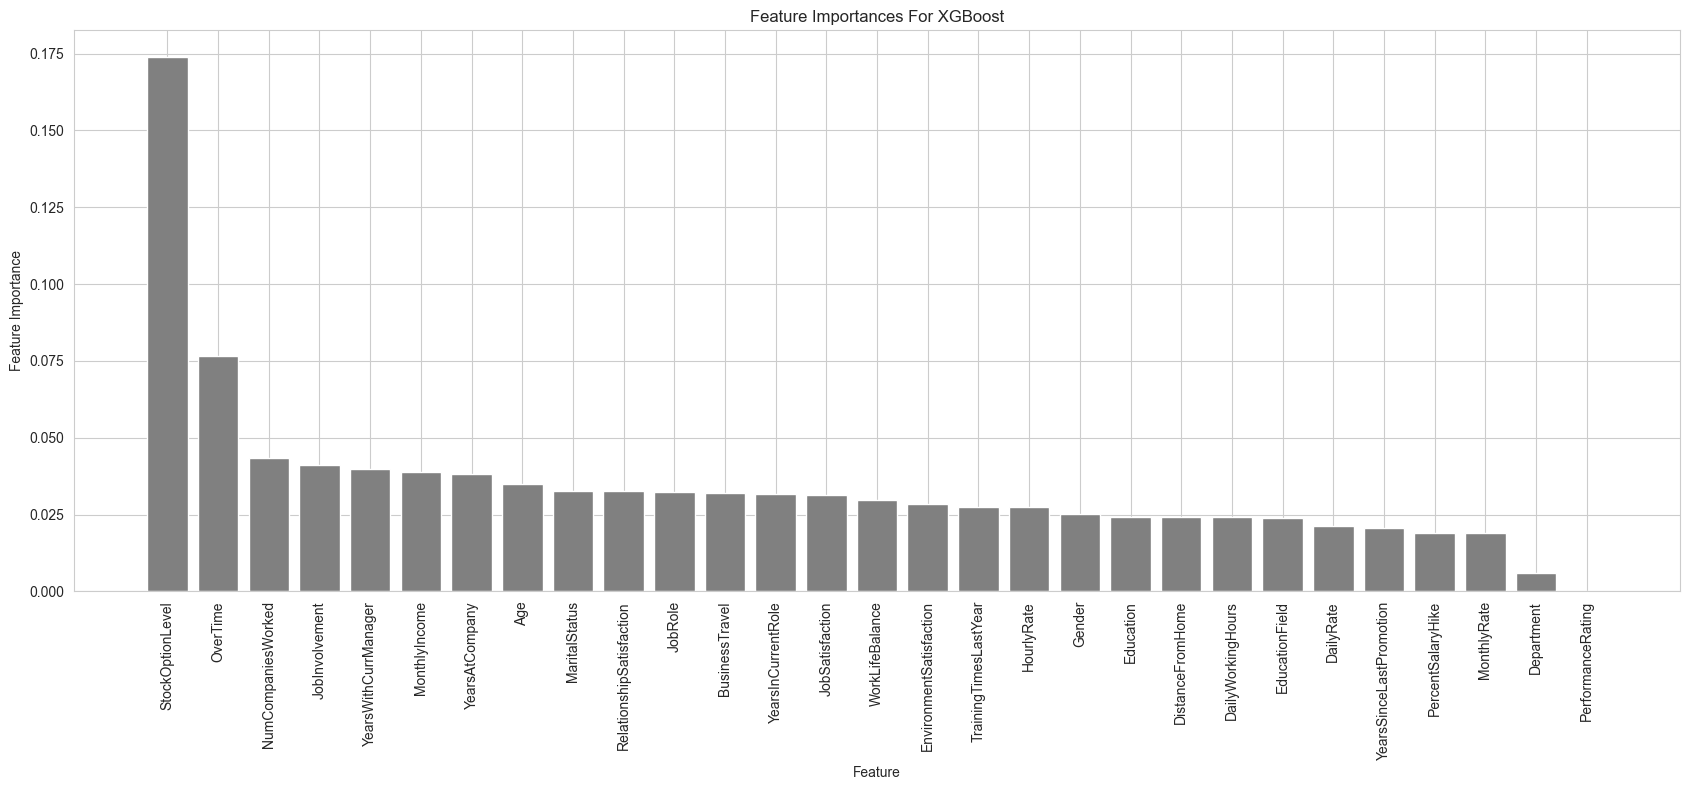

In [460]:
# Get feature importances from the trained model
feature_importances = xgbmodel.feature_importances_

# Get the column names of the features
feature_names = X_train.columns

# Sort the feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(17, 8))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx], align="center",color='grey')
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importances For XGBoost")
plt.tight_layout()
plt.show()


### Random Forest Model

The accuracy score of our model on the Training set is:  100.000000%
The ROC-AUC score of our model on the Training set is:  100.000000%
The F1 score of our model on the Training set is:  100.000000% 


Random Forest Algo. Cross-validation Accuracy Scores: [0.97311637 0.96053577 0.97199081 0.99087906 0.97985493]
Mean Accuracy: 0.9752753845002523 

The accuracy score of our model on the Validation set is:  97.544454%
The ROC-AUC score of our model on the Validation set is:  97.545528%
The F1 score of our model on the Validation set is:  97.544454% 


Random Forest Algo. Cross-validation Accuracy Scores: [0.97311637 0.96053577 0.97199081 0.99087906 0.97985493]
Mean Accuracy: 0.9752753845002523 

Classification report on Validation set
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       591
         1.0       0.96      0.99      0.98       590

    accuracy                           0.98      1181
   macro avg       0.98      0.98      

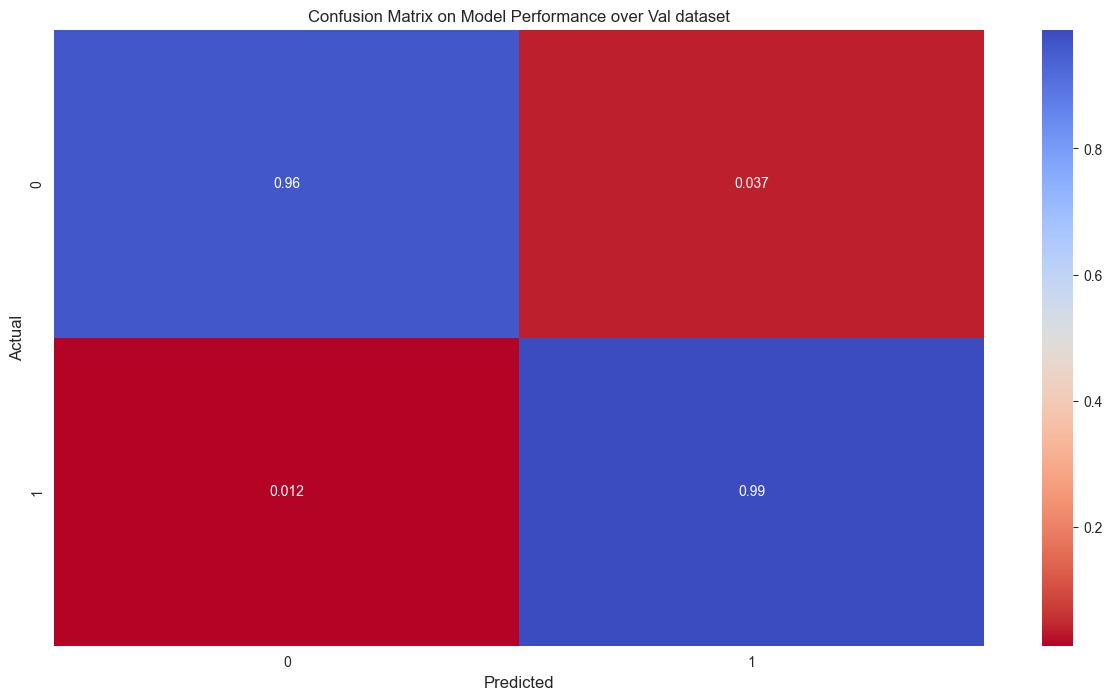

In [461]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_jobs=-1,random_state=42)
predict_report(rf_classifier, 'Random Forest Algo.')

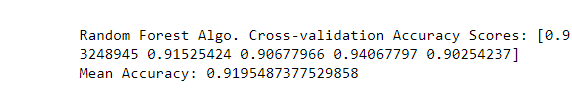

### SVM Model

In [462]:
from sklearn.svm import SVC

The accuracy score of our model on the Training set is:  86.166008%
The ROC-AUC score of our model on the Training set is:  86.164377%
The F1 score of our model on the Training set is:  86.166008% 


SVC Cross-validation Accuracy Scores: [0.87686939 0.82325481 0.82763574 0.88013502 0.86613042]
Mean Accuracy: 0.854805076296534 

The accuracy score of our model on the Validation set is:  82.726503%
The ROC-AUC score of our model on the Validation set is:  82.728928%
The F1 score of our model on the Validation set is:  82.726503% 


SVC Cross-validation Accuracy Scores: [0.87686939 0.82325481 0.82763574 0.88013502 0.86613042]
Mean Accuracy: 0.854805076296534 

Classification report on Validation set
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82       591
         1.0       0.81      0.86      0.83       590

    accuracy                           0.83      1181
   macro avg       0.83      0.83      0.83      1181
weighted avg       0.8

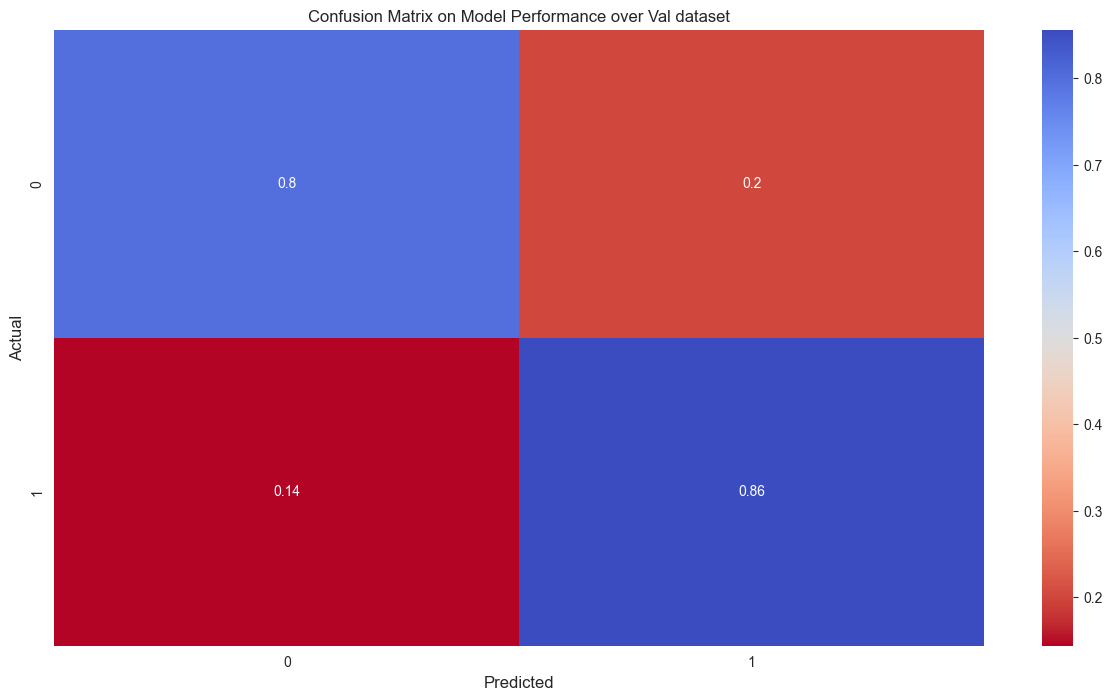

In [463]:
svc_model = SVC(probability=True)
predict_report(svc_model,'SVC')

### KNN model

In [464]:
from sklearn.neighbors import KNeighborsClassifier

The accuracy score of our model on the Training set is:  88.311688%
The ROC-AUC score of our model on the Training set is:  88.306998%
The F1 score of our model on the Training set is:  88.311688% 


KNN Model Cross-validation Accuracy Scores: [0.7867469  0.72637173 0.7877765  0.86160586 0.78906923]
Mean Accuracy: 0.7903140457561939 

The accuracy score of our model on the Validation set is:  82.303133%
The ROC-AUC score of our model on the Validation set is:  82.312082%
The F1 score of our model on the Validation set is:  82.303133% 


KNN Model Cross-validation Accuracy Scores: [0.7867469  0.72637173 0.7877765  0.86160586 0.78906923]
Mean Accuracy: 0.7903140457561939 

Classification report on Validation set
              precision    recall  f1-score   support

         0.0       0.91      0.72      0.80       591
         1.0       0.77      0.93      0.84       590

    accuracy                           0.82      1181
   macro avg       0.84      0.82      0.82      1181
weighted

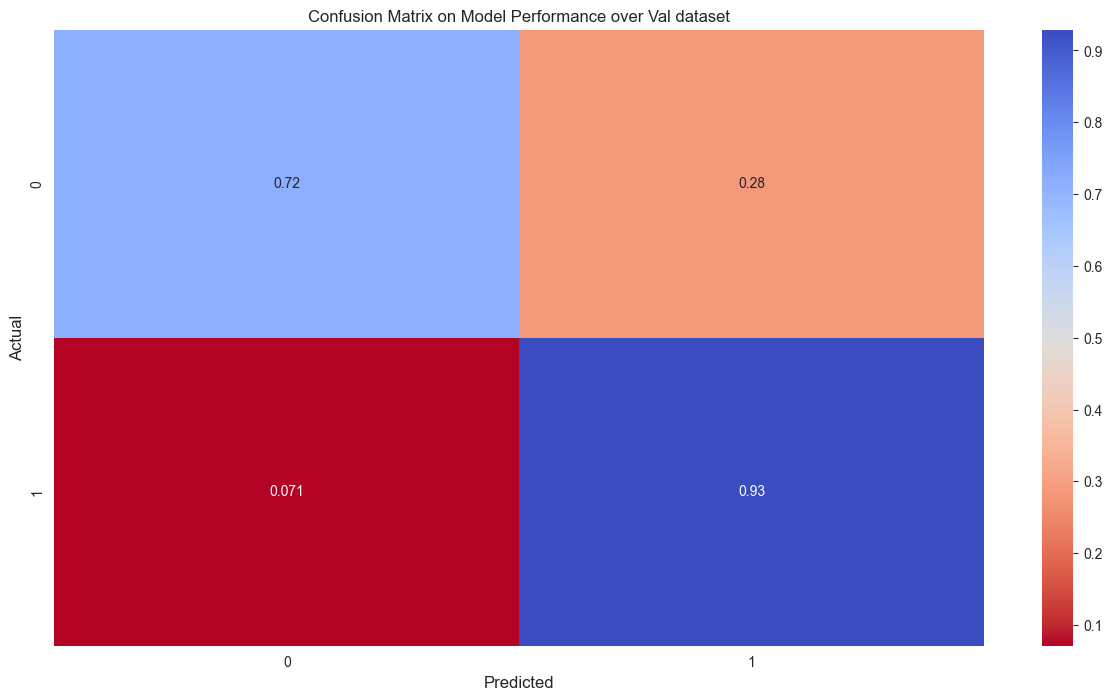

In [465]:
knn_model = KNeighborsClassifier()
predict_report(knn_model,'KNN Model')

### Decision Tree Model

In [466]:
from sklearn.tree import DecisionTreeClassifier

The accuracy score of our model on the Training set is:  100.000000%
The ROC-AUC score of our model on the Training set is:  100.000000%
The F1 score of our model on the Training set is:  100.000000% 


Decision Tree Cross-validation Accuracy Scores: [0.83990884 0.83898305 0.89830508 0.90254237 0.86440678]
Mean Accuracy: 0.8688292266058966 

The accuracy score of our model on the Validation set is:  91.701948%
The ROC-AUC score of our model on the Validation set is:  91.708251%
The F1 score of our model on the Validation set is:  91.701948% 


Decision Tree Cross-validation Accuracy Scores: [0.85678678 0.81779661 0.88135593 0.88135593 0.84745763]
Mean Accuracy: 0.8569505768409058 

Classification report on Validation set
              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91       591
         1.0       0.86      0.99      0.92       590

    accuracy                           0.92      1181
   macro avg       0.93      0.92      0.92      11

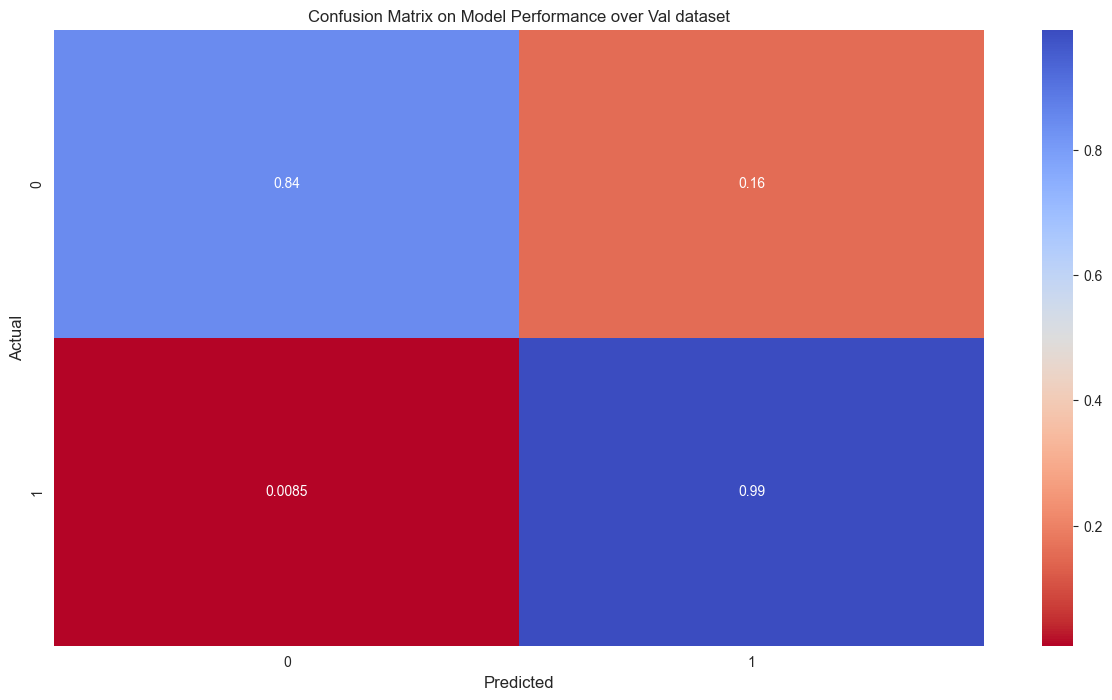

In [467]:
decision_tree = DecisionTreeClassifier()
predict_report(decision_tree, 'Decision Tree')

### LightGBM Classifier

In [468]:
from lightgbm import LGBMClassifier

[LightGBM] [Info] Number of positive: 886, number of negative: 885
[LightGBM] [Info] Total Bins 1333
[LightGBM] [Info] Number of data points in the train set: 1771, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500282 -> initscore=0.001129
[LightGBM] [Info] Start training from score 0.001129
The accuracy score of our model on the Training set is:  100.000000%
The ROC-AUC score of our model on the Training set is:  100.000000%
The F1 score of our model on the Training set is:  100.000000% 


[LightGBM] [Info] Number of positive: 472, number of negative: 472
[LightGBM] [Info] Total Bins 1321
[LightGBM] [Info] Number of data points in the train set: 944, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 472, number of negative: 473
[LightGBM] [Info] Total Bins 1318
[LightGBM] [Info] Number 

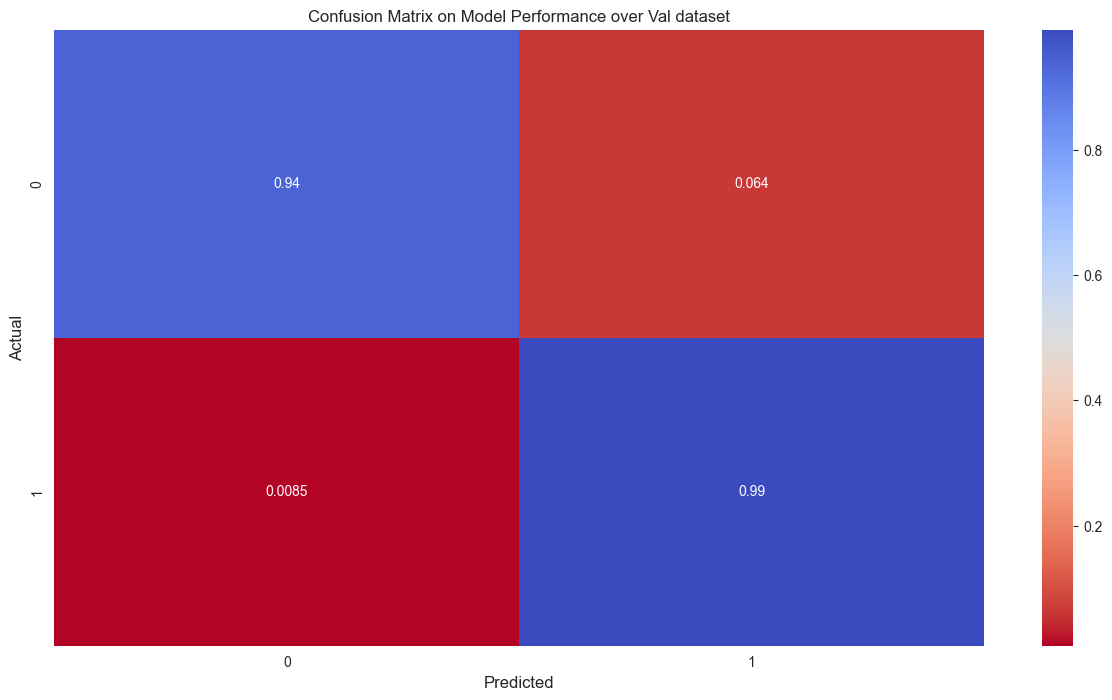

In [469]:
lightgbm_model = LGBMClassifier(force_row_wise=True)
predict_report(lightgbm_model,"Light GBM")

### CatBoost Model

In [470]:
from catboost import CatBoostClassifier

The accuracy score of our model on the Training set is:  100.000000%
The ROC-AUC score of our model on the Training set is:  100.000000%
The F1 score of our model on the Training set is:  100.000000% 


Cat Boost Classifier Cross-validation Accuracy Scores: [0.96624412 0.93881069 0.96423442 0.99590635 0.97033898]
Mean Accuracy: 0.9671069117103894 

The accuracy score of our model on the Validation set is:  96.697714%
The ROC-AUC score of our model on the Validation set is:  96.699791%
The F1 score of our model on the Validation set is:  96.697714% 


Cat Boost Classifier Cross-validation Accuracy Scores: [0.96624412 0.93881069 0.96423442 0.99590635 0.97033898]
Mean Accuracy: 0.9671069117103894 

Classification report on Validation set
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97       591
         1.0       0.95      0.99      0.97       590

    accuracy                           0.97      1181
   macro avg       0.97      0.97    

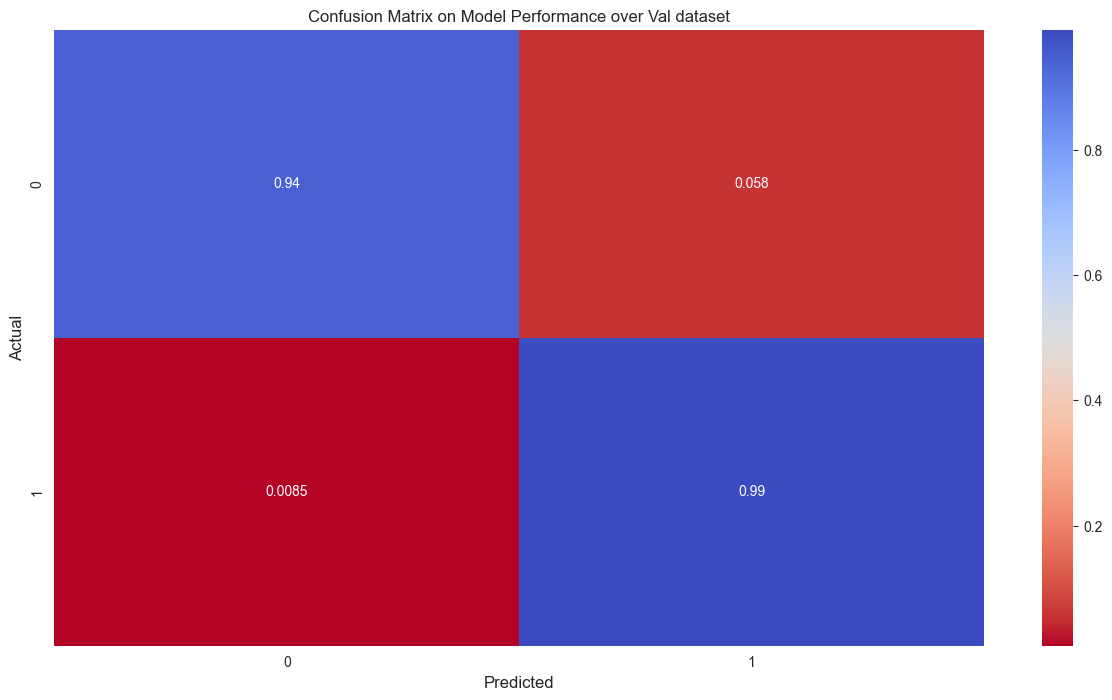

In [471]:
catboost = CatBoostClassifier(verbose=False,learning_rate=0.3)
predict_report(catboost, 'Cat Boost Classifier')

### Voting Classifier

In [472]:
from sklearn.ensemble import VotingClassifier

The accuracy score of our model on the Training set is:  100.000000%
The ROC-AUC score of our model on the Training set is:  100.000000%
The F1 score of our model on the Training set is:  100.000000% 


Voting Classifier Cross-validation Accuracy Scores: [0.96674263 0.92150244 0.96078713 0.9844154  0.97436082]
Mean Accuracy: 0.9615616829897716 

The accuracy score of our model on the Validation set is:  95.681626%
The ROC-AUC score of our model on the Validation set is:  95.684562%
The F1 score of our model on the Validation set is:  95.681626% 


Voting Classifier Cross-validation Accuracy Scores: [0.96674263 0.92150244 0.96078713 0.9844154  0.97436082]
Mean Accuracy: 0.9615616829897716 

Classification report on Validation set
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96       591
         1.0       0.93      0.99      0.96       590

    accuracy                           0.96      1181
   macro avg       0.96      0.96      0.96

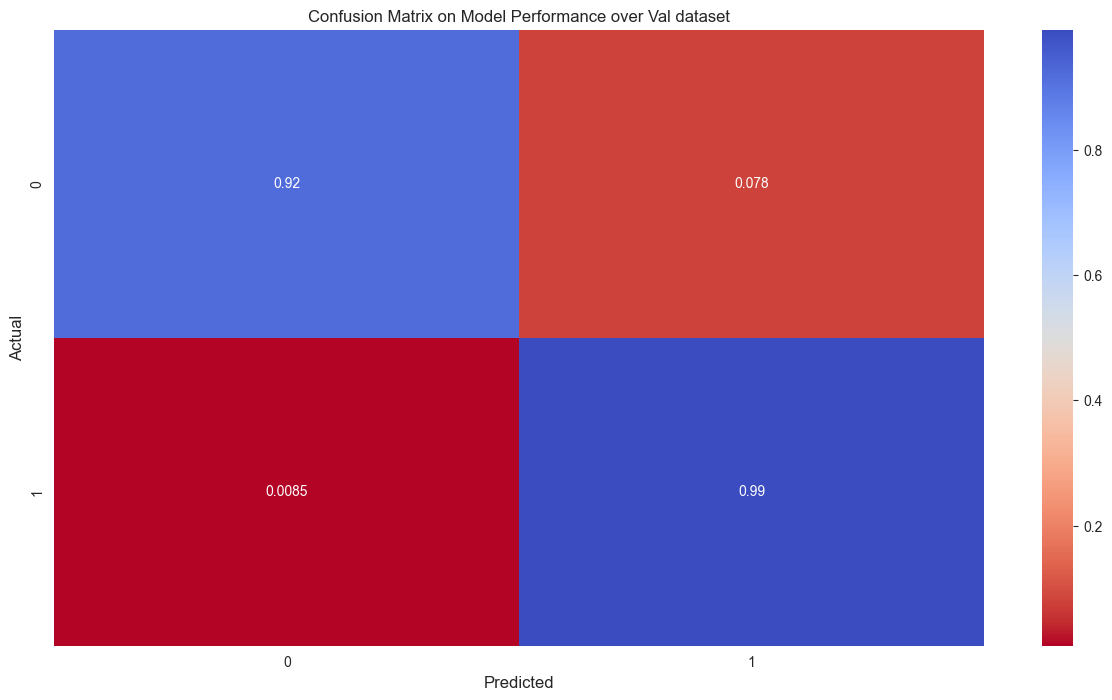

In [473]:
voting_classifier = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('random forest', rf_classifier),
        ('xgboost', xgbmodel)
    ],
    voting='soft'  # Choose 'hard' or 'soft' voting
)

# Fit the voting classifier on the training data
predict_report(voting_classifier, 'Voting Classifier')

In [474]:
performance_df = pd.DataFrame(perf_dic).T
performance_df.columns = ['val_accuracy', 'val_roc-auc', 'val-f1', 'mean_cross_val_score']
performance_df

,val_accuracy,val_roc-auc,val-f1,mean_cross_val_score
LogisticRegression,73.84%,73.84%,73.84%,81.18%
XGBoost,96.02%,96.02%,96.02%,95.76%
Random Forest Algo.,97.54%,97.55%,97.54%,97.53%
SVC,82.73%,82.73%,82.73%,85.48%
KNN Model,82.30%,82.31%,82.30%,79.03%
Decision Tree,91.70%,91.71%,91.70%,86.88%
Light GBM,96.36%,96.36%,96.36%,96.54%
Cat Boost Classifier,96.70%,96.70%,96.70%,96.71%
Voting Classifier,95.68%,95.68%,95.68%,96.16%


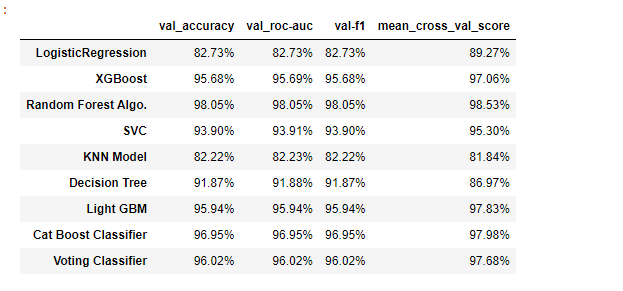

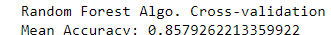

In [139]:
from sklearn.model_selection import RandomizedSearchCV


# Define hyperparameters and their possible values
param_dist = {
    'intercept_scaling': np.arange(0.1,1.1,0.1), 
    'l1_ratio': np.arange(0.1,1.1,0.1), 
    'penalty': ['l1', 'l2'],          
    'fit_intercept': [True, False],          
    'max_iter': np.arange(100, 20000, 10),  
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    lr,
    param_distributions=param_dist,
    n_iter=100000,  # Number of random parameter combinations to try
    cv=5,       # Number of cross-validation folds
    scoring='roc_auc',  # Use accuracy as the evaluation metric
    random_state=42,
    n_jobs=-1,  # Use all available CPU cores
    verbose=1
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, Y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
accuracy = best_model.score(X_val, Y_val)
print("Test Accuracy with Best Model:", accuracy)


Fitting 5 folds for each of 100000 candidates, totalling 500000 fits
Best Hyperparameters: {'penalty': 'l2', 'max_iter': 100, 'l1_ratio': 0.1, 'intercept_scaling': 0.30000000000000004, 'fit_intercept': True}
Test Accuracy with Best Model: 0.8272650296359018


### <u> Prediction on the test data</u>

In [475]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119 entries, 0 to 1118
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1119 non-null   int64  
 1   Age                       1119 non-null   int64  
 2   BusinessTravel            1119 non-null   object 
 3   DailyRate                 1119 non-null   float64
 4   Department                1119 non-null   object 
 5   DistanceFromHome          1119 non-null   int64  
 6   Education                 1119 non-null   int64  
 7   EducationField            1119 non-null   object 
 8   EnvironmentSatisfaction   1119 non-null   int64  
 9   Gender                    1119 non-null   object 
 10  HourlyRate                1119 non-null   int64  
 11  JobInvolvement            1119 non-null   int64  
 12  JobLevel                  1119 non-null   int64  
 13  JobRole                   1119 non-null   object 
 14  JobSatis

In [479]:
# test_data_pre = preprocessor.transform(test_df.drop(columns=['id']))

for col in cat_cols:
    test_df[col] = encoder.fit_transform(test_df[col])
test_df[num_cols] = scaler.transform(test_df[num_cols])

In [142]:
# test_data = pd.DataFrame(test_data_pre, columns=preprocessor.get_feature_names_out())

In [143]:
### Removing the columns I removed earlier before training to prevent data leakage from high correlation
# test_data.drop(columns=['cat__Department_Human Resources'], inplace=True)

In [489]:
test_predictions = voting_classifier.predict_proba(test_df.drop(columns=['ind','id', 'JobLevel', 'Attrition']))[:,1]

In [490]:
test_predictions

array([0.39060468, 0.2225662 , 0.12079433, ..., 0.13922154, 0.14962535,
       0.04249847])

In [491]:
submission_dict = {id_value: prediction for id_value, prediction in zip(test_df['id'].tolist(), test_predictions)}
submission_dict

{1677: 0.3906046807319797,
 1678: 0.22256620179073136,
 1679: 0.12079432566124411,
 1680: 0.2515600388866385,
 1681: 0.7987622345815909,
 1682: 0.22488015914780887,
 1683: 0.12151454340777527,
 1684: 0.4574711740765911,
 1685: 0.10166496687150266,
 1686: 0.42747000287071796,
 1687: 0.0376528751999769,
 1688: 0.3176446550970095,
 1689: 0.04257746873941864,
 1690: 0.10720549994530677,
 1691: 0.6424016168711691,
 1692: 0.7739046652670122,
 1693: 0.41833622194768383,
 1694: 0.36071012959033494,
 1695: 0.5179525508094095,
 1696: 0.2102972727934819,
 1697: 0.6719149893311841,
 1698: 0.12271972237277982,
 1699: 0.30469082297139466,
 1700: 0.2134298836121533,
 1701: 0.6990886029444526,
 1702: 0.19372552144607635,
 1703: 0.2776873537247483,
 1704: 0.05137546315437667,
 1705: 0.34351024753628784,
 1706: 0.193804007504359,
 1707: 0.2456016652297035,
 1708: 0.21093783255723328,
 1709: 0.21794933894737656,
 1710: 0.3363466923187091,
 1711: 0.34086651851583033,
 1712: 0.8109541081898507,
 1713: 0.04

In [492]:
## Turning the submission dictionary into the required format for submission (dataframe)
submission_df = pd.DataFrame(list(submission_dict.items()), columns=['id', 'Attrition'])
submission_df.head()

,id,Attrition
0,1677,0.390605
1,1678,0.222566
2,1679,0.120794
3,1680,0.251560
4,1681,0.798762


In [493]:
### Exporting the submission into csv format
submission_df.to_csv('final_predictions.csv', index=False)

#### Upsample coluns
- target
- gender